

# Web Scraping for Indeed.com and Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being able to extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression or any other suitable classifier.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10").

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters:

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [73]:
url = "https://www.indeed.com/jobs?q=data+scientist+$20,000&l=New+York&start=10"

In [74]:
r=requests.get(url)

In [75]:
soup = BeautifulSoup(r.text, 'html.parser')

In [76]:
#extract all interesting features in first ten pages of new york listings
job_title=[]
company=[]
rating=[]
location=[]
summary=[]
salary=[]


for x in tqdm_notebook(range(0, 100,10)):
    url = "https://www.indeed.com/jobs?q=data+scientist+$20,000&l=New+York&start={}".format(x)
    r=requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')

    for job in soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
       #extract job titles
        try:
            job_title.append(job.find('div', attrs={'class': 'title'}).text)
        except:
            job_title.append(np.nan)
        #extract company
        try:
            company.append(job.find('span', attrs={'class': 'company'}).text)
        except:
            company.append(np.nan)
        #extract rating   
        try:
            rating.append(job.find('span', attrs={'class':'rating'})) #rating is given as width in pixels
        except:
            rating.append(np.nan)
        #extract location
        try:
            location.append(job.find('span', attrs={'class':'location'}).text)
        except:
            location.append(np.nan)
        #extract job summary    
        try:
            summary.append(job.find('div', attrs={'class':'summary'}).text)
        except:
            summary.append(np.nan)
        #extract salary
        try:
            salary.append(job.find('span', attrs={'class':'salary'}).text)
        except:
            salary.append(np.nan)

In [77]:
df_dic={'job_title':job_title, 'company':company, 'rating': rating, 'location':location,'salary':salary}
df=pd.DataFrame(df_dic)
print('SHAPE:',df.shape, '\n')
print('NULL VALUES:\n',df.isnull().sum())

SHAPE: (100, 5) 

NULL VALUES:
 job_title     0
company       0
rating        3
location      0
salary       86
dtype: int64


### Write 4 functions to extract each item: location, company, job, and salary.

Example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- **Make sure these functions are robust and can handle cases where the data/field may not be available.**
    - Remember to check if a field is empty or `None` for attempting to call methods on it.
    - Remember to use `try/except` if you anticipate errors.
- **Test** the functions on the results above and simple examples.

In [78]:
def extract_location_from_result(result):
    location=[]
    for job in result:
        try:
            location.append(job.find('span', attrs={'class':'location'}).text.strip())
        except:
            location.append(np.nan)
    return location
       
    

In [79]:
def extract_company_from_result(result):
    company=[]
    for job in result:
        try:
            company.append(job.find('span', attrs={'class': 'company'}).text.strip())
        except:
            company.append(np.nan)
    return company

In [80]:
def extract_job_from_result(result):
    job_title=[]
    for job in result:
        try:
            job_title.append(job.find('div', attrs={'class': 'title'}).text.strip())
        except:
            job_title.append(np.nan)
    return job_title

In [81]:
def extract_salary_from_result(result):
    salary=[]
    for job in result:
        try:
            salary.append(job.find('span', attrs={'class':'salary'}).text.strip())
        except:
            salary.append(np.nan)
    return salary

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [ ]:
url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

results = []

for city in tqdm_notebook(set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami'])):
    for start in range(0, max_results_per_city, 10):
        
        url = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}".format(city,start)
        r=requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        results+=soup.find_all('div', attrs={'class':'jobsearch-SerpJobCard'})
            # Grab the results from the request (as above)
            # Append to the full set of results
        

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [ ]:
len(results)

In [ ]:
result_dic={'title':extract_job_from_result(results),
            'location':extract_location_from_result(results),
            'company':extract_company_from_result(results),
            'salary':extract_salary_from_result(results)}

scraped_data=pd.DataFrame(result_dic)

In [ ]:
scraped_data.isnull().sum()

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [ ]:
#drop duplicates rows (keep first)
scraped_data.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
#drop Nans 
scraped_data.dropna(inplace=True)

In [ ]:
#filter data frame for annual salaries only (they all contain 'year')
scraped_data=scraped_data[scraped_data['salary'].str.contains("year")]

In [ ]:
#Helper function to extract salary information into numeric format
def get_salary(salary_info):
    #strip and split
    split_salary=salary_info.replace(',','').replace('$',' ').split(' ') 
    salary=[]
    #add only numbers into list
    for i in split_salary:
        if i.isnumeric():                           
            salary.append(int(i))
    #extract average if salary is a range, otherwise just extract salary        
    if len(salary)==2:                              
        return np.mean(salary)                      
    if len(salary)==1:
        return salary[0]

In [ ]:
#Clean salary information using helper function
scraped_data.salary=[get_salary(i) for i in scraped_data.salary]

In [ ]:
#Set location column to just be city of location
#NOTE: this should be done when the model is only intended to be applied
#      to locations that feature in our training set
scraped_data.location=[i.split(',')[0] for i in scraped_data.location]

In [ ]:
scraped_data.shape

### Save your results as a CSV

In [ ]:
#save dataframe to csv
#hash out once saved so as not to overwrite previous saves
#scraped_data.to_csv('clean_scraped_data.csv', index=False)
#scraped_data.to_csv('clean_scraped_data_2.csv', index=False)
#scraped_data.to_csv('clean_scraped_data_3.csv', index=False)
#scraped_data.to_csv('clean_scraped_data_4.csv', index=False)

## QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your model's performance.

In [2]:
#added again: run from here when reopening notebook file
import requests
import bs4
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Load in the the data of scraped salaries

In [3]:
#import clean scraped data
data_frame= pd.read_csv('clean_scraped_data.csv')
data_frame_2=pd.read_csv('clean_scraped_data_2.csv')
data_frame_3=pd.read_csv('clean_scraped_data_3.csv')
data_frame_4=pd.read_csv('clean_scraped_data_4.csv')

In [4]:
#show size of each data set, show size of combined data set with duplicates removed
print(data_frame.shape)
print(data_frame_2.shape)
print(data_frame_3.shape)
print(data_frame_4.shape)
print(pd.concat([data_frame,data_frame_2, data_frame_3, data_frame_4]).drop_duplicates(subset=None, keep='first').shape)

(578, 4)
(624, 4)
(616, 4)
(544, 4)
(1462, 4)


In [5]:
#create new dataframe of all scrapes combined with duplicates removed
df=pd.concat([data_frame,data_frame_2, data_frame_3,data_frame_4]).drop_duplicates(subset=None, keep='first')

In [5]:
df.location.value_counts().tail(20)

Canastota       1
Kent            1
West Mifflin    1
Gilbert         1
Bronx Zoo       1
Lombard         1
Torrance        1
Arlington       1
Oak Brook       1
Tucker          1
Buckley AFB     1
Wayne           1
Media           1
Addison         1
Carrollton      1
Irwindale       1
Rochester       1
Voorhees        1
Saxonburg       1
Rome            1
Name: location, dtype: int64

A lot of locations have a low count, one of the reasons for this is the search function on indeed.com is not the most accurate when it comes to searching by location.<br>
        I will drop rows where the location is featured less than 10 times in the entire data set. This will increase the ratio of observations to variables (which means we can have greater confidence in the legitimacy of our coefficients associated with location variables because they are based on larger sample sizes of corresponding locations).<br>
        More broadly we are not concerned with dropping locations with low frequency in our data set because we would prefer to work in an area where there is an established data science industry; if there is only one data science job in the associated location it would be less likely that there is an established industry in the area, assuming jobs without salary information are evenly distributed (i.e dropped locations would not be present in the dataset we apply our final model to, assuming we were predicting the salary for a job we were willing to take). 
        
        


In [6]:
#decide the x, currently 10
df=df.groupby('location').filter(lambda x : len(x)>10)

In [7]:
#this is another and more appropriate way to filter data
#df[df.location.isin(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
#    'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
#    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami'])].shape

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.shape #need more observations! 

(1170, 4)

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

#### Thought experiment: What is the baseline accuracy for this model?

For a binary classification model the baseline accuracy is equal to the frequency of the most common class.

If the median is used as a threshold for classification then we would expect our classes to be approximately evenly split (exactly even when the median is an average of two salaries, approximately when the median corresponds to a salary in our data, in which case we need to decide which class the median salary belongs too - high or low).

Accordingly, if we split high/low at the 25th or 75th percentile the majority class will make up approximately 75% of the observations (in both cases), therefore baseline accuracy would be approximately .75

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


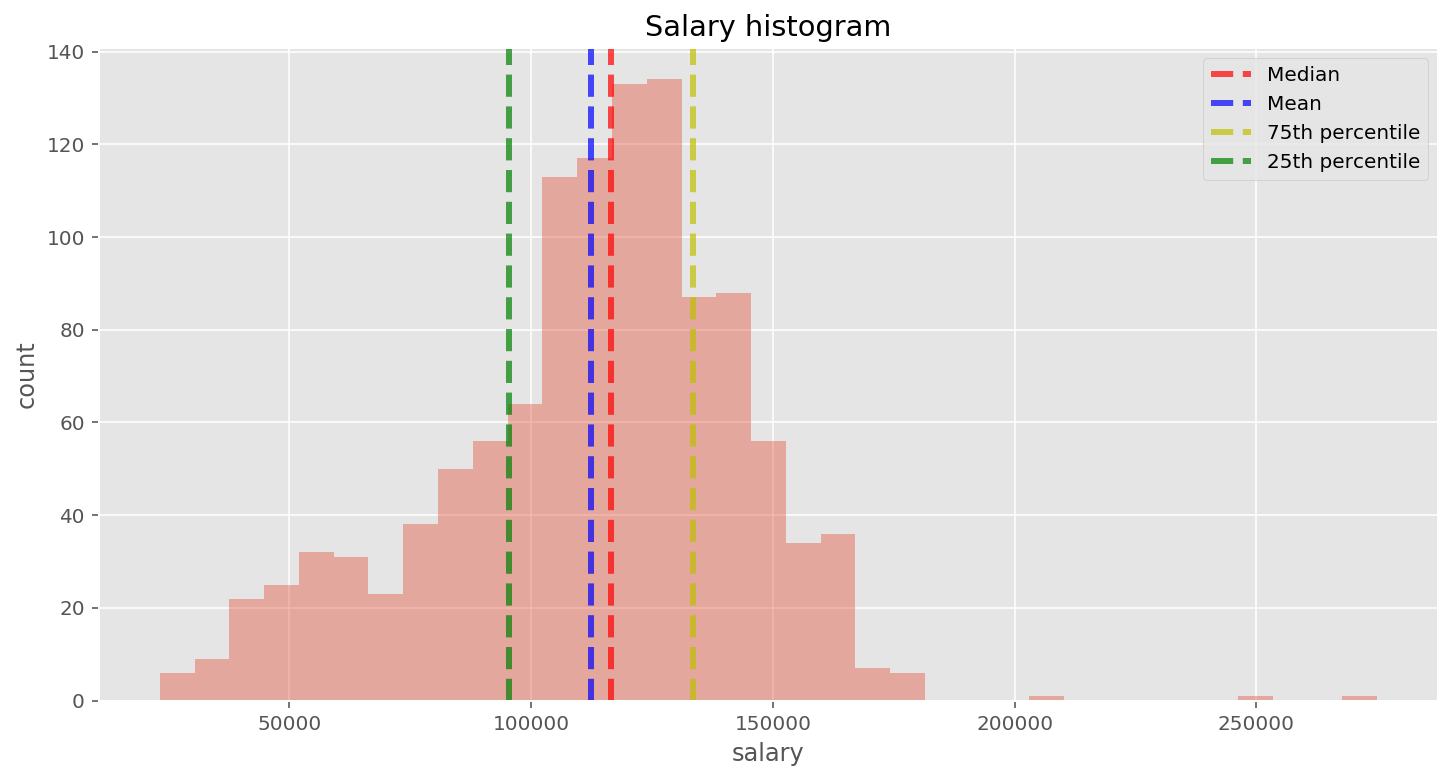

In [11]:
fig= plt.figure(figsize=(12,6))
ax=fig.gca()

ax.axvline(df.salary.median(), ls='dashed', lw=3, color='r',
           alpha=0.7, label='Median')
ax.axvline(df.salary.mean(), ls='dashed', lw=3, color='b',
           alpha=0.7, label='Mean')

ax.axvline(np.percentile(df.salary, 75), ls='dashed', lw=3, color='y',
           alpha=0.7, label='75th percentile')
ax.axvline(np.percentile(df.salary, 25), ls='dashed', lw=3, color='g',
           alpha=0.7, label='25th percentile')

ax.set_title('Salary histogram')
ax.set_ylabel('count')

sns.distplot(df.salary, kde=False)
plt.legend()
plt.show()

A look at the salary histogram gives a clearer view of the distbution of salaries and the presence of any anomolies. This could be used to inform our chosen threshold for high/low salary (which is ultimately a personal preference, but a preference that is better informed when user is presented with a visualistaion of the distribution of all salaries in the industry).

In [12]:
#1 for high, 0 for low
df['level']=[1 if x>= df.salary.median() else 0 for x in df.salary]

In [13]:
df.salary.median()

116500.0

In [14]:
df.head()

title  location    company    salary  level
0                  Data Scientist   Redmond    Coso IT  115000.0      0
1                  Data Scientist   Redmond   Facebook  114000.0      0
2       Data Scientist, Analytics   Seattle   Facebook  148000.0      1
3  Data Scientist / Data Engineer  Bellevue    Thunder  128500.0      1
4                  Data Scientist   Seattle  TenPoint7  130500.0      1

### Create a classification model to predict High/Low salary. 


#### Model based on location:

- Start by ONLY using the location as a feature. 
- Use logistic regression with both statsmodels and sklearn.
- Use a further classifier you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.

#### Model taking into account job levels and categories:

- Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title. 
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value? 
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models. 
- Discuss model coefficients or feature importances as applicable.

#### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. 


- Use cross-validation to evaluate your models. 
- Evaluate the accuracy, AUC, precision and recall of the models. 
- Plot the ROC and precision-recall curves for at least one of your models.

## Location only as predictor

### Modelling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [16]:
#set up target and predictor
X=pd.get_dummies(df.location, drop_first=False)
y=df.level

#train-test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, stratify=y, shuffle=True ,random_state=1)



In [17]:
#optimal logistic regression model 
lr = LogisticRegression()

gs_params = {'penalty': [ 'l2'],
             'solver': ['lbfgs'],
             'C': np.logspace(-4, 4, 10),
            'max_iter': [100,250, 500]}

lr_gridsearch = GridSearchCV(lr,
                             gs_params,
                             n_jobs=2, 
                             cv=5, 
                             verbose=0)


In [18]:
lr_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'penalty': ['l2'], 'solver': ['lbfgs'], 'C': array([1.00000e-04, 7.74264e-04, 5.99484e-03, 4.64159e-02, 3.59381e-01,
       2.78256e+00, 2.15443e+01, 1.66810e+02, 1.29155e+03, 1.00000e+04]), 'max_iter': [100, 250, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
print('SKLEARN LOGISTIC REGRESSION MODELLING')
print('best parameters:',lr_gridsearch.best_params_)
print('best cv score:',lr_gridsearch.best_score_)
print('train score:',lr_gridsearch.score(X_train, y_train))
print('test score:', lr_gridsearch.score(X_test, y_test))

SKLEARN LOGISTIC REGRESSION MODELLING
best parameters: {'C': 0.046415888336127774, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
best cv score: 0.688034188034188
train score: 0.6944444444444444
test score: 0.6709401709401709


In [20]:
#NOTE WE TOOK A DIFFERENT C HERE TO TURN REGULARISATION OFF!
#WE FINALLY SEE THE PROBABILITIES ASSOCIATED WITH EACH CITY ARE THE SAME

lr= LogisticRegression(C= 10**10,
                       max_iter= lr_gridsearch.best_params_['max_iter'],
                       penalty= 'l2', solver= 'lbfgs')

In [21]:
lr.fit(X_train, y_train)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [22]:
#collect coefficients in dataframe
lr_coefs=pd.DataFrame([X_train.columns, lr.coef_[0]]).T
lr_coefs.columns=['location','coef']
lr_coefs.set_index('location', inplace=True)
lr_coefs=lr_coefs.sort_values('coef', ascending=True)

In [23]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
#import statsmodels.formula.api as sm
#import patsy

In [24]:
#add column of 1's for fit intercept
Xs_train=X_train.copy()
Xs_test=X_test.copy()
Xs_train['intercept']=[1 for number in range(X_train.shape[0])]
Xs_test['intercept']=[1 for number in range(X_test.shape[0])]

In [25]:
stat_model = sm.Logit(y_train, Xs_train).fit(method='lbfgs', maxiter=500)

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [26]:
#coefficients for stat_model
sm_coefs=pd.DataFrame(stat_model.params, columns=['coef']).drop('intercept').sort_values('coef', ascending=True)

In [27]:
#accuracy of model
accuracy_score(((stat_model.predict(Xs_test)>.5)*1),y_test)

0.6324786324786325

In [28]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Model coefficients and predicted probabilities

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


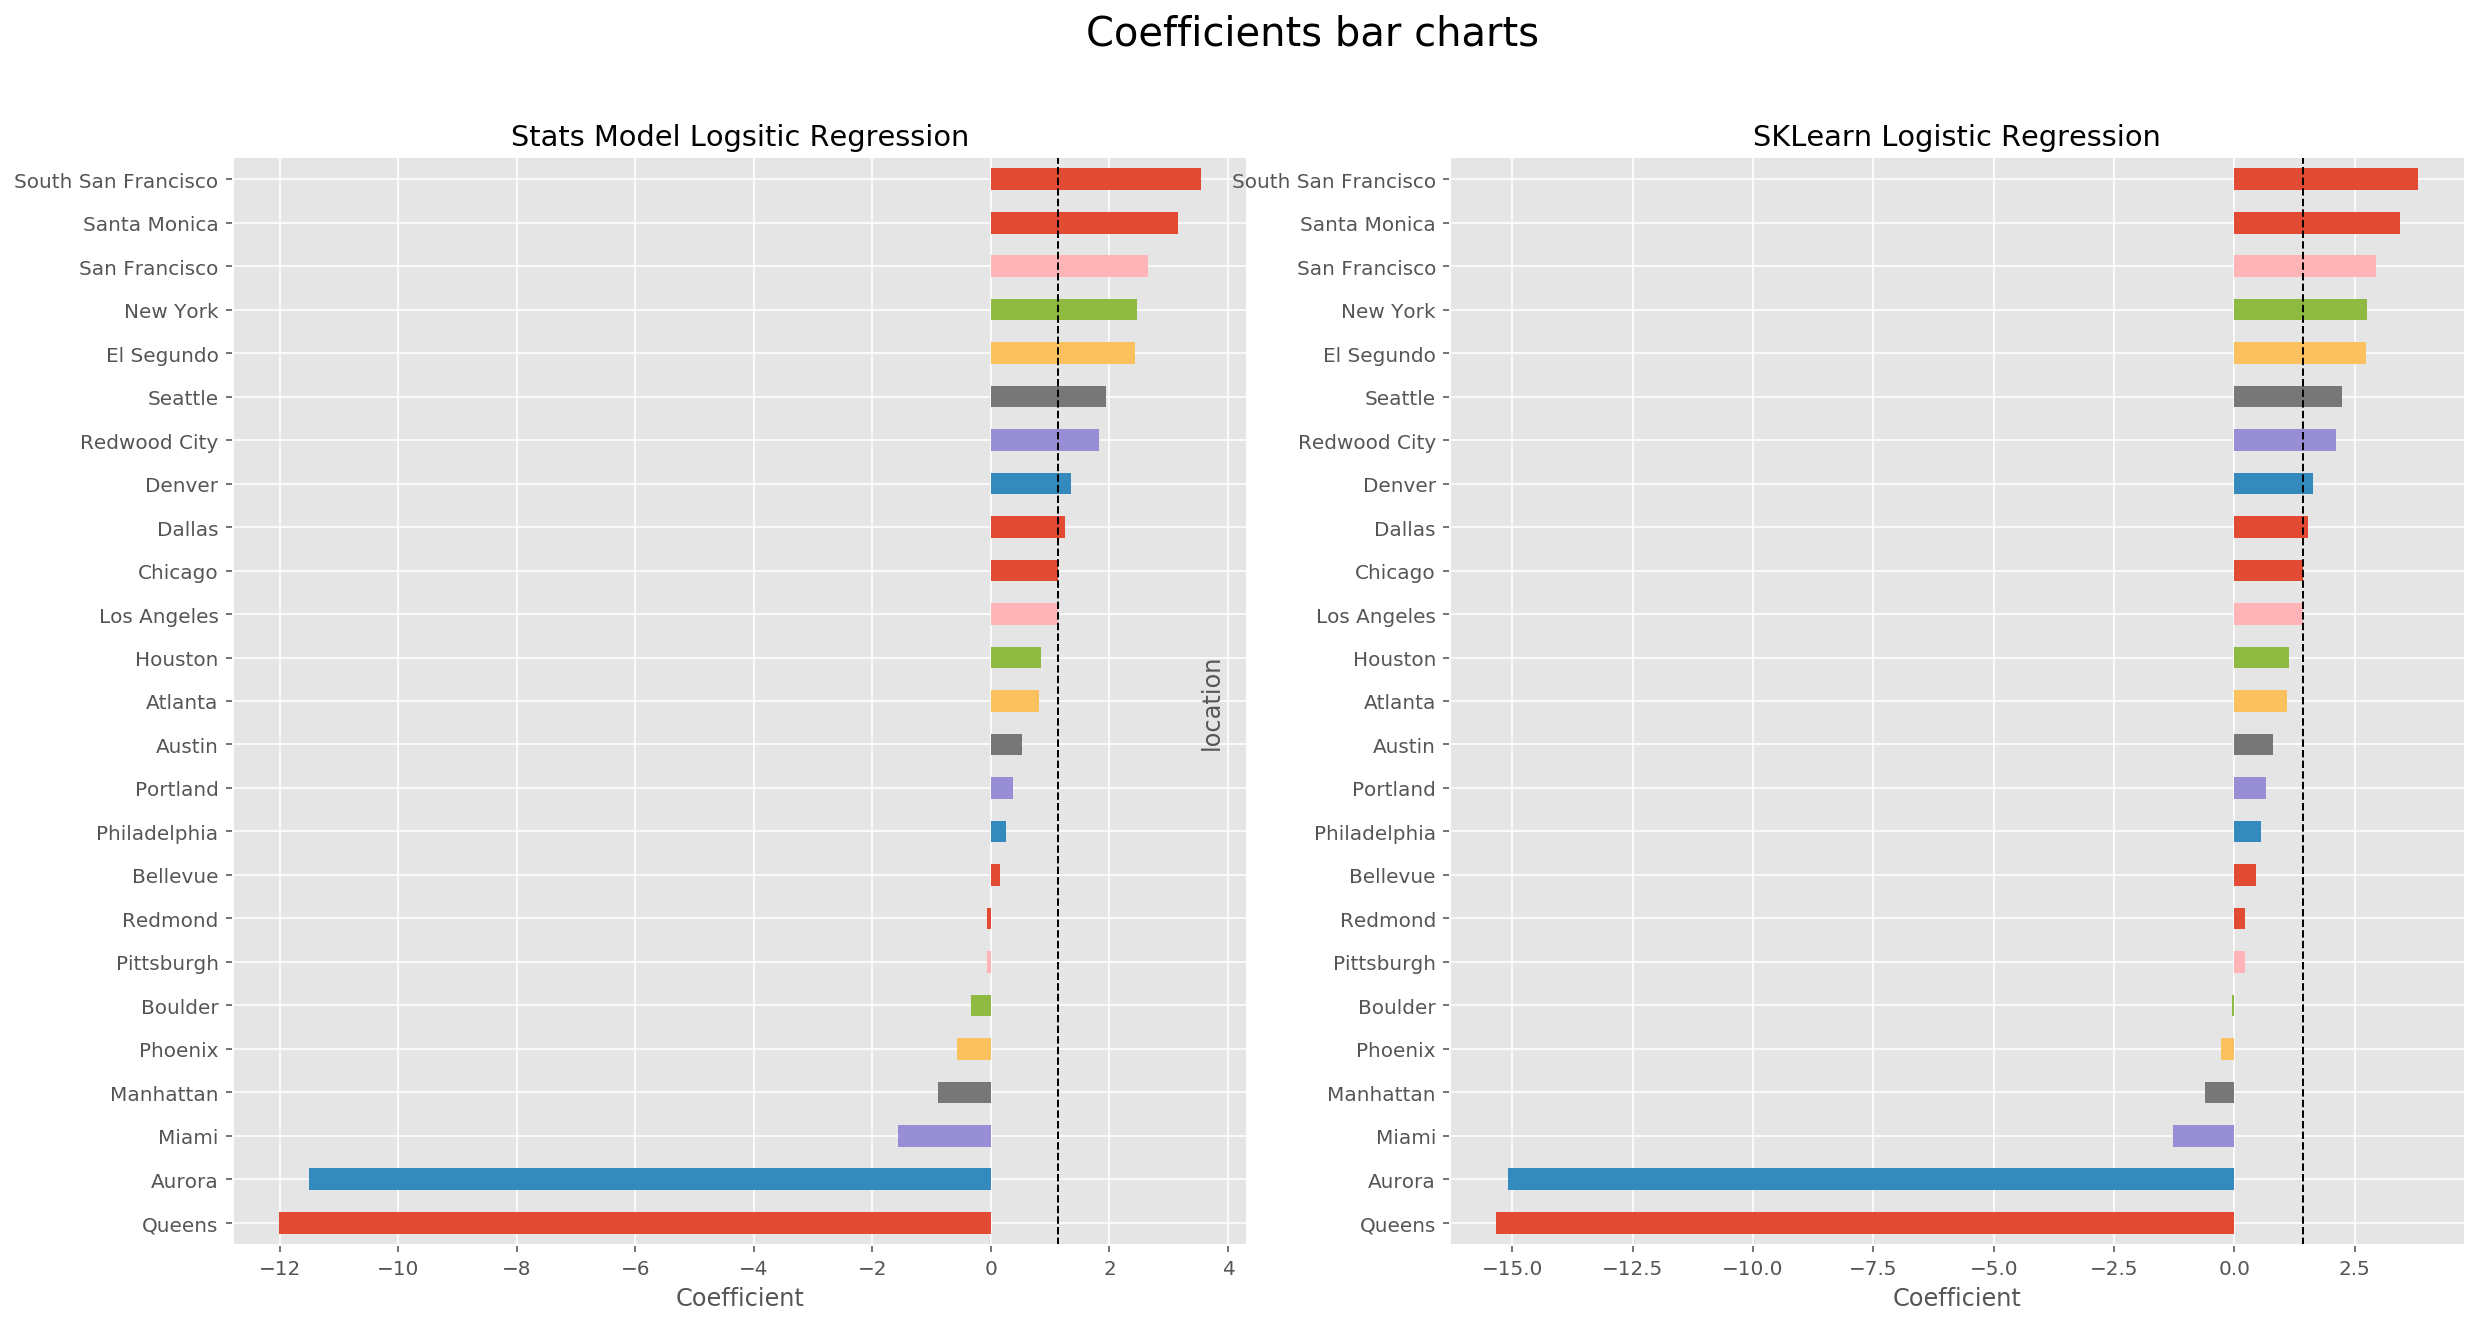

In [29]:
#plot coefficients of both models next to each other
#add intercept line
fig, ax= plt.subplots(ncols=2, figsize=(20,10))

fig.suptitle('Coefficients bar charts', fontsize=20)

plt.axes(ax[0])
sm_coefs.coef.plot(kind='barh')
ax[0].axvline(stat_model.params.intercept*-1, ls='dashed', lw=1, color='black',
           alpha=1, label='Intercept')
ax[0].set_xlabel('Coefficient')
ax[0].set_title('Stats Model Logsitic Regression')

plt.axes(ax[1])
lr_coefs.coef.plot(kind='barh')
ax[1].axvline(lr.intercept_*-1, ls='dashed', lw=1, color='black',
           alpha=1, label='Intercept')
ax[1].set_xlabel('Coefficient')
ax[1].set_title('SKLearn Logistic Regression')

plt.show()

The charts above show the coefficients associated with each location for the stats and sklearn modelling functions.

The similarity lies in whether each city's coefficient is greater or less than the plotted intercept line. If a coefficient is greater than the intercept, the model will predict a high salary for all jobs in that city (and vice versa). In instances where the distribution of high and low salaries in a city is close to even, the models may disagree in it's predictions for that city, (this is a result of the different iterative processes both models use to arrive at their final coefficients).

Models based on location only will result in almost identical predictions when using .5 as the threshold for making predictions (i.e the threshold at which the model makes its most accurate predictions).  The reason for this is that the the predictors are entirely made up of mutually exclusive categories; so for each location in the training set a majority vote (on high/low salary) determines the predictions the model considers optimal.

In [30]:
#Helper function for comparing predicted probabilities of each location
#also print proportion of high/low wage for city in training set
def compare_predictions(location):
    print('prob of high wage with SKlearn::',lr.predict_proba(X_train[X_train[location]==1])[0][1])
    print('prob of high wage with Stats Model', list(stat_model.predict(Xs_train[Xs_train[location]==1]))[0])
    print('proportion in training set with high wage:',y_train.loc[X_train[X_train[location]==1].index].mean())

In [31]:
compare_predictions('Aurora')

prob of high wage with SKlearn:: 6.692737436151401e-08
prob of high wage with Stats Model 3.209147557503414e-06
proportion in training set with high wage: 0.0


Although the predictions at a .5 threshold are the same, the predicted probabilities associated with each city have significant variation between models. Let's investigate this further by looking at the probability of high salary associated with each city.

In [32]:
def collect_predictions(location):
    return (lr.predict_proba(X_train[X_train[location]==1])[0][1],
            list(stat_model.predict(Xs_train[Xs_train[location]==1]))[0])

In [33]:
#Collect probability associated with each city
sk_p=[]
sm_p=[]
for city in X_train.columns:
    sk_p.append(collect_predictions(city)[0])
    sm_p.append(collect_predictions(city)[1])
    


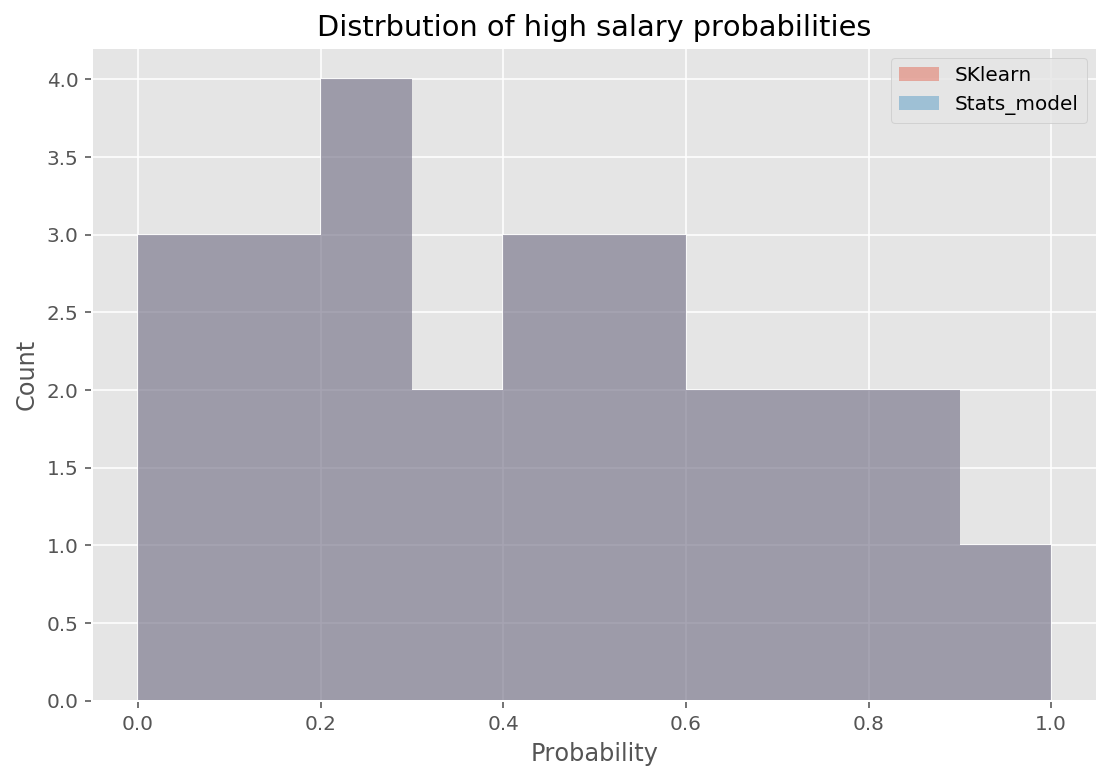

In [34]:
fig= plt.figure(figsize=(9,6))
ax= fig.gca()

bins = np.linspace(0, 1, 11)

sns.distplot(sk_p, bins, kde=False)
sns.distplot(sm_p, bins, kde=False)


ax.set_title('Distrbution of high salary probabilities')
ax.set_ylabel('Count')
ax.set_xlabel('Probability')

plt.legend(['SKlearn','Stats_model'])
plt.show()

In [35]:
#See analysis of models for commentary on graph

### Additional modelling (decision tree classifier)

In [36]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

from ipywidgets import *
from IPython.display import display
from IPython.display import Image

In [37]:
#The stats model predicted probabilities are very close to the proportion of high salary jobs
#for each city. The Decision Tree model, given no limitations on depth, should have probabilities
#exactly equal to the proportion of high salary jobs in each city.

dt=DecisionTreeRegressor(max_depth=None)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
#accuracy score on test set
(((dt.predict(X_test)>.5)*1==y_test)*1).mean() #accuracy score same as stats_model

0.6495726495726496

In [39]:
#Hash out everything below to view decision tree
#dot_data = StringIO()
#export_graphviz(dt,
#                    out_file=dot_data,
#                   filled=True,
#                  rounded=True
#                  special_characters=True,
#                    feature_names=X_train.columns)
                    

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Image(graph.create_png())

In [40]:
#Feature importance dataframe, sorted
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values(by='importance', ascending=True)

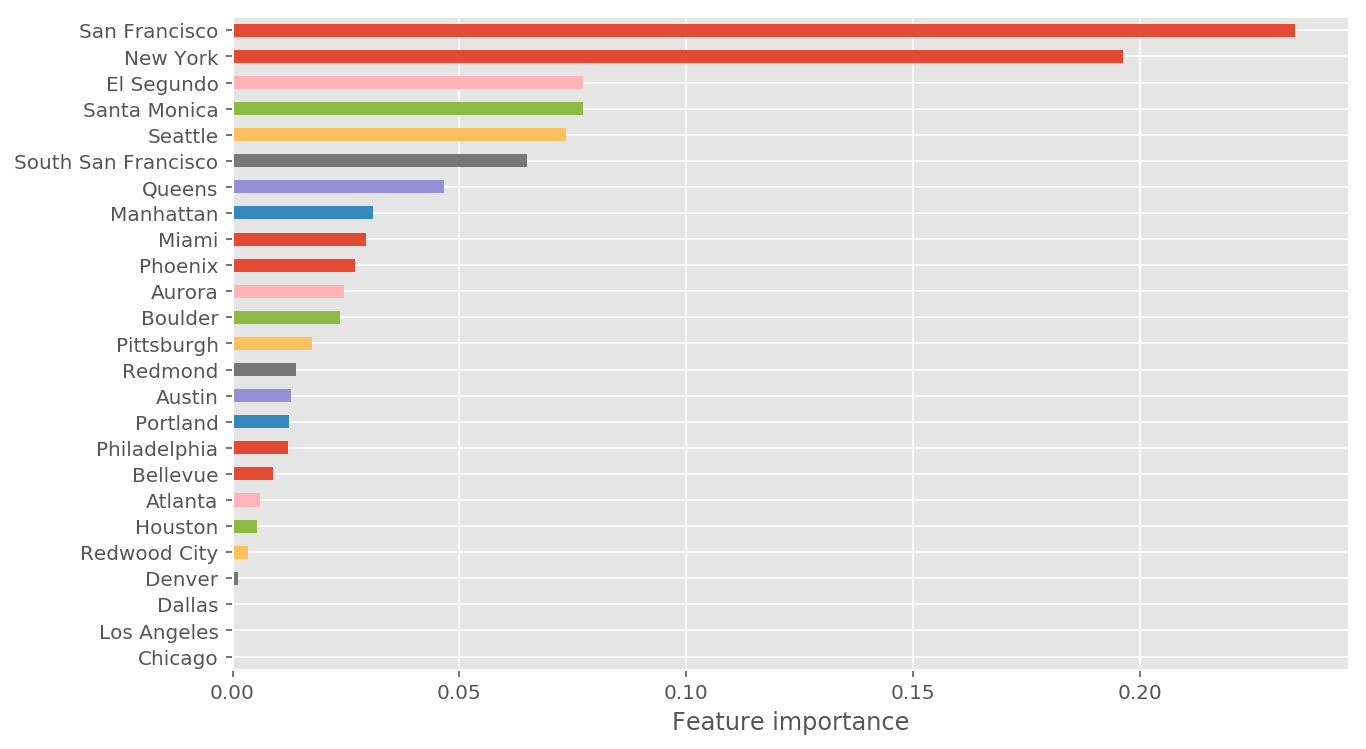

In [41]:
#Feature importance
fig=plt.figure(figsize=(10,6))
ax=fig.gca()
feature_importances.importance.plot(kind='barh')
ax.set_xlabel('Feature importance')
plt.show()

In [42]:
#See analysis of models for commentary on graph

In [43]:
#collect probability of high salary associated with each city for decision tree model
def collect_more_predictions(location):
    return dt.predict(X_train[X_train[location]==1])[0]

dt_p=[]
for city in X_train:
    dt_p.append(collect_more_predictions(city))

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


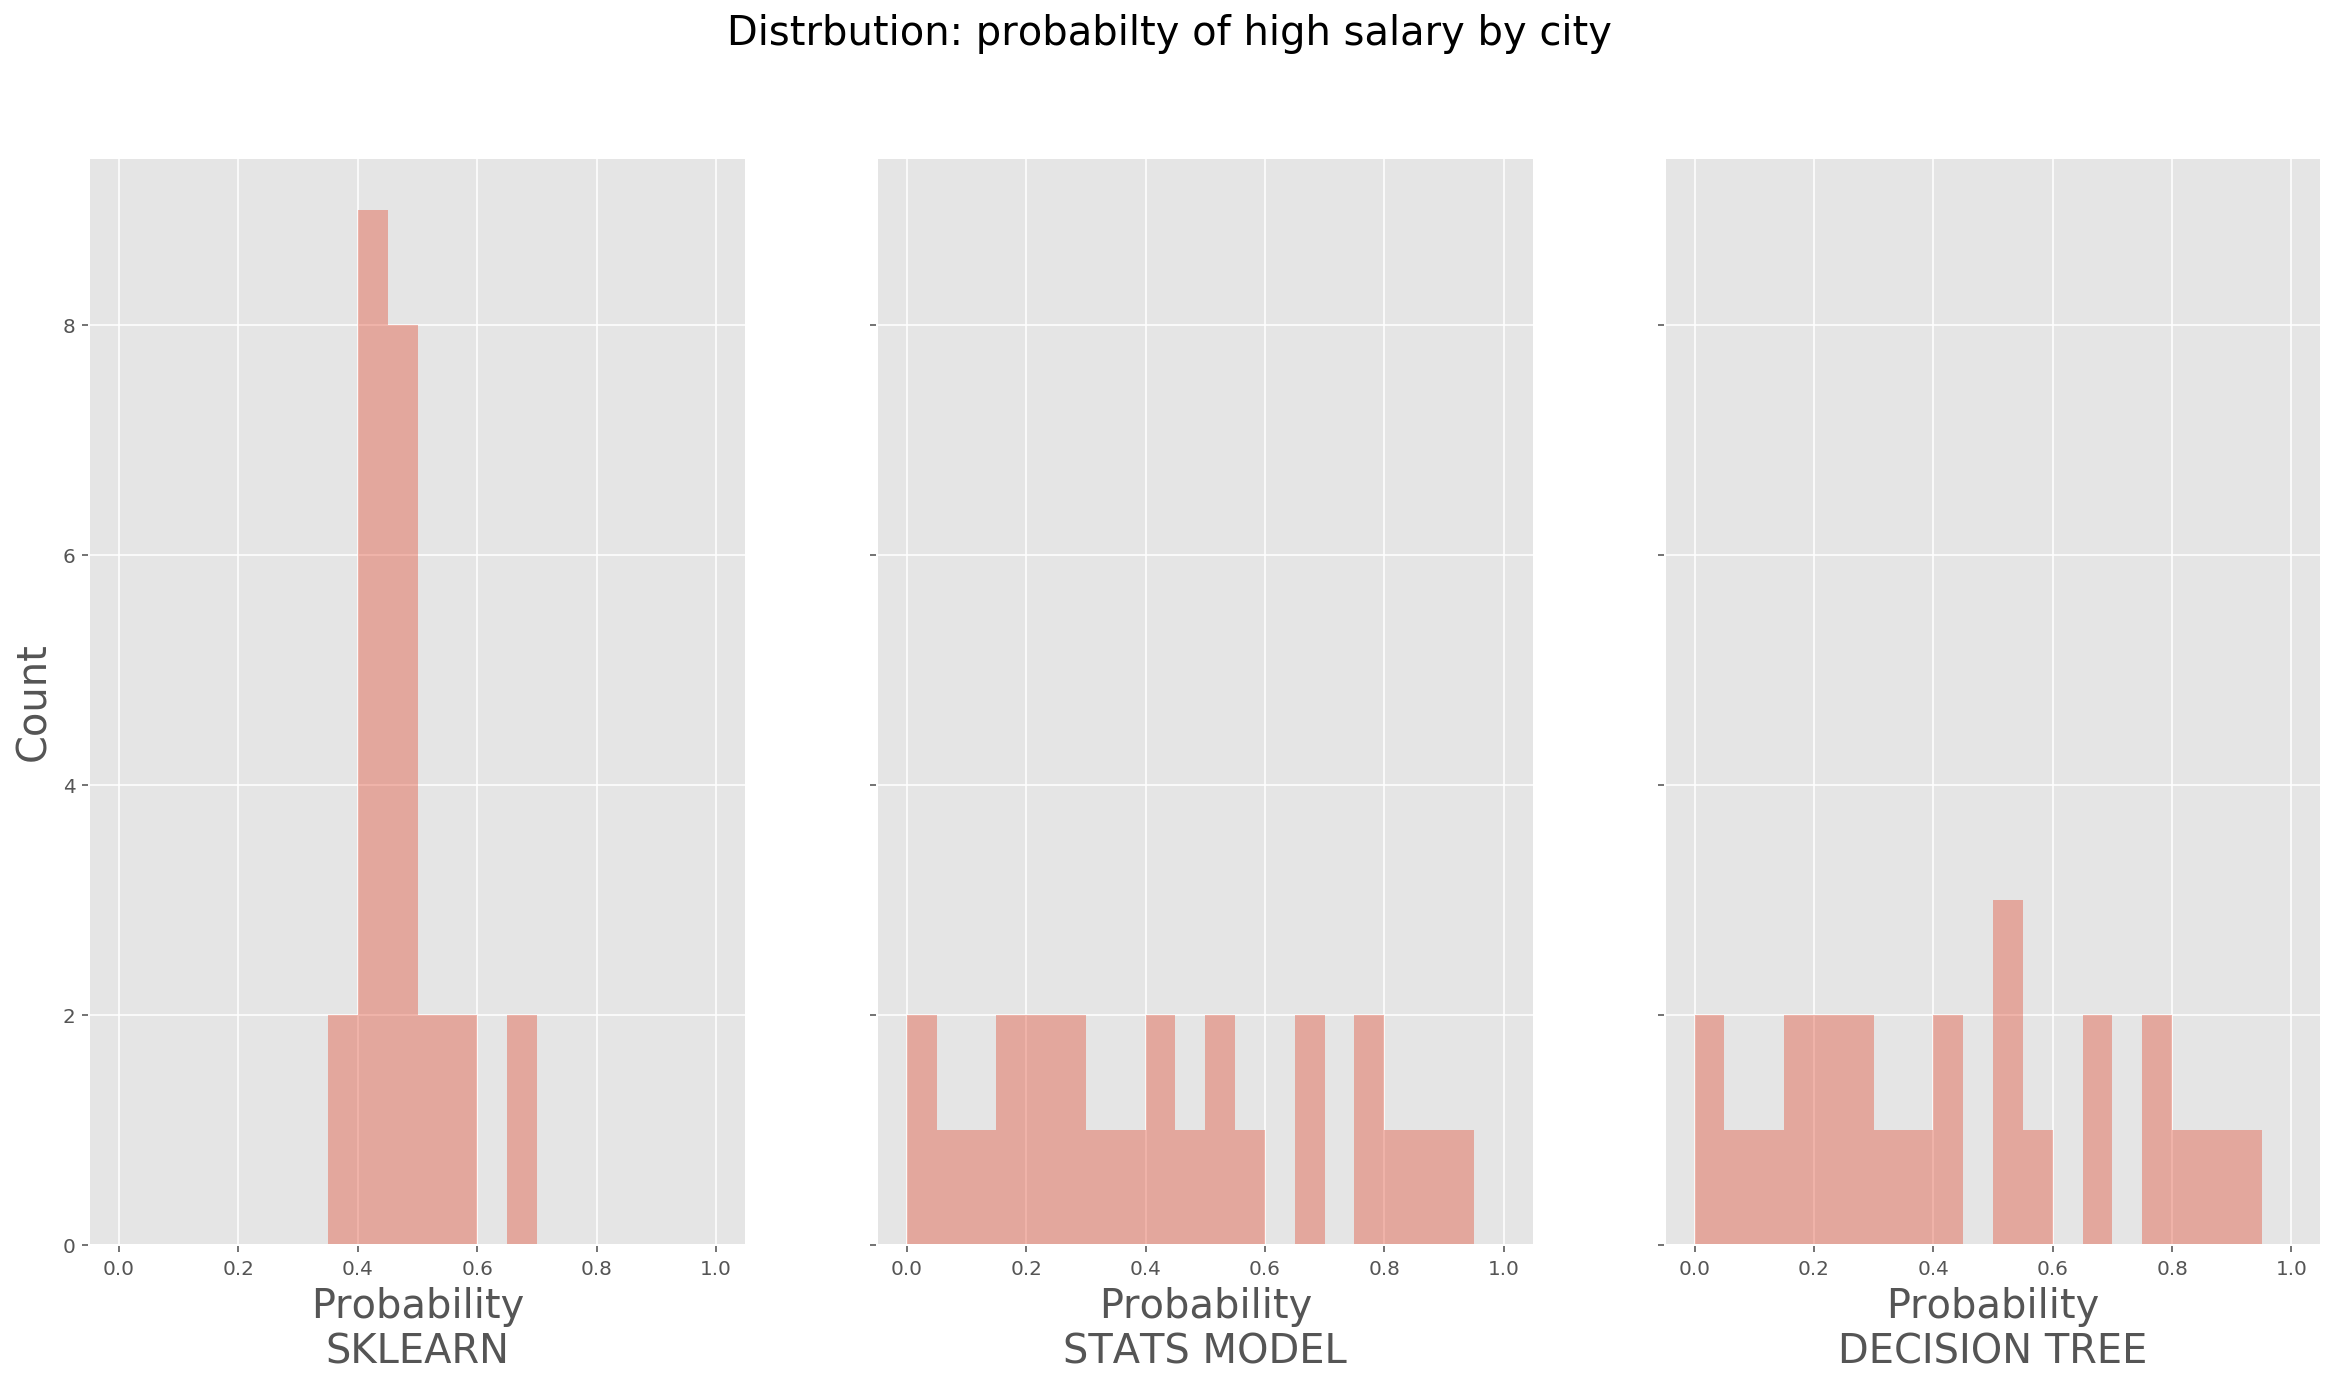

In [44]:
fig, ax= plt.subplots(ncols=3, figsize=(20,10), sharex=True, sharey=True)
fig.suptitle('Distrbution: probabilty of high salary by city', fontsize=20)

bins = np.linspace(0, 1, 21)

plt.axes(ax[0])
sns.distplot(sk_p, bins, kde=False)
ax[0].set_ylabel('Count', fontsize=20)
ax[0].set_xlabel('Probability\nSKLEARN',fontsize=20)

plt.axes(ax[1])
sns.distplot(sm_p, bins, kde=False)
ax[1].set_xlabel('Probability\nSTATS MODEL',fontsize=20)


plt.axes(ax[2])
sns.distplot(dt_p, bins, kde=False)
ax[2].set_xlabel('Probability\nDECISION TREE',fontsize=20)

plt.show()

In [45]:
#See analysis of models for commentary on graph

In [46]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [47]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, pd.DataFrame(lr.predict_proba(X_test)).iloc[:,1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

sm_fpr, sm_tpr, sm_threshold = roc_curve(y_test, pd.DataFrame(pd.DataFrame(stat_model.predict(Xs_test)).iloc[:,0]))
sm_roc_auc = auc(sm_fpr, sm_tpr)

dt_fpr, dt_tpr, dt_threshold = roc_curve(y_test, pd.DataFrame(pd.DataFrame(dt.predict(X_test))))
dt_roc_auc = auc(dt_fpr, dt_tpr)

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


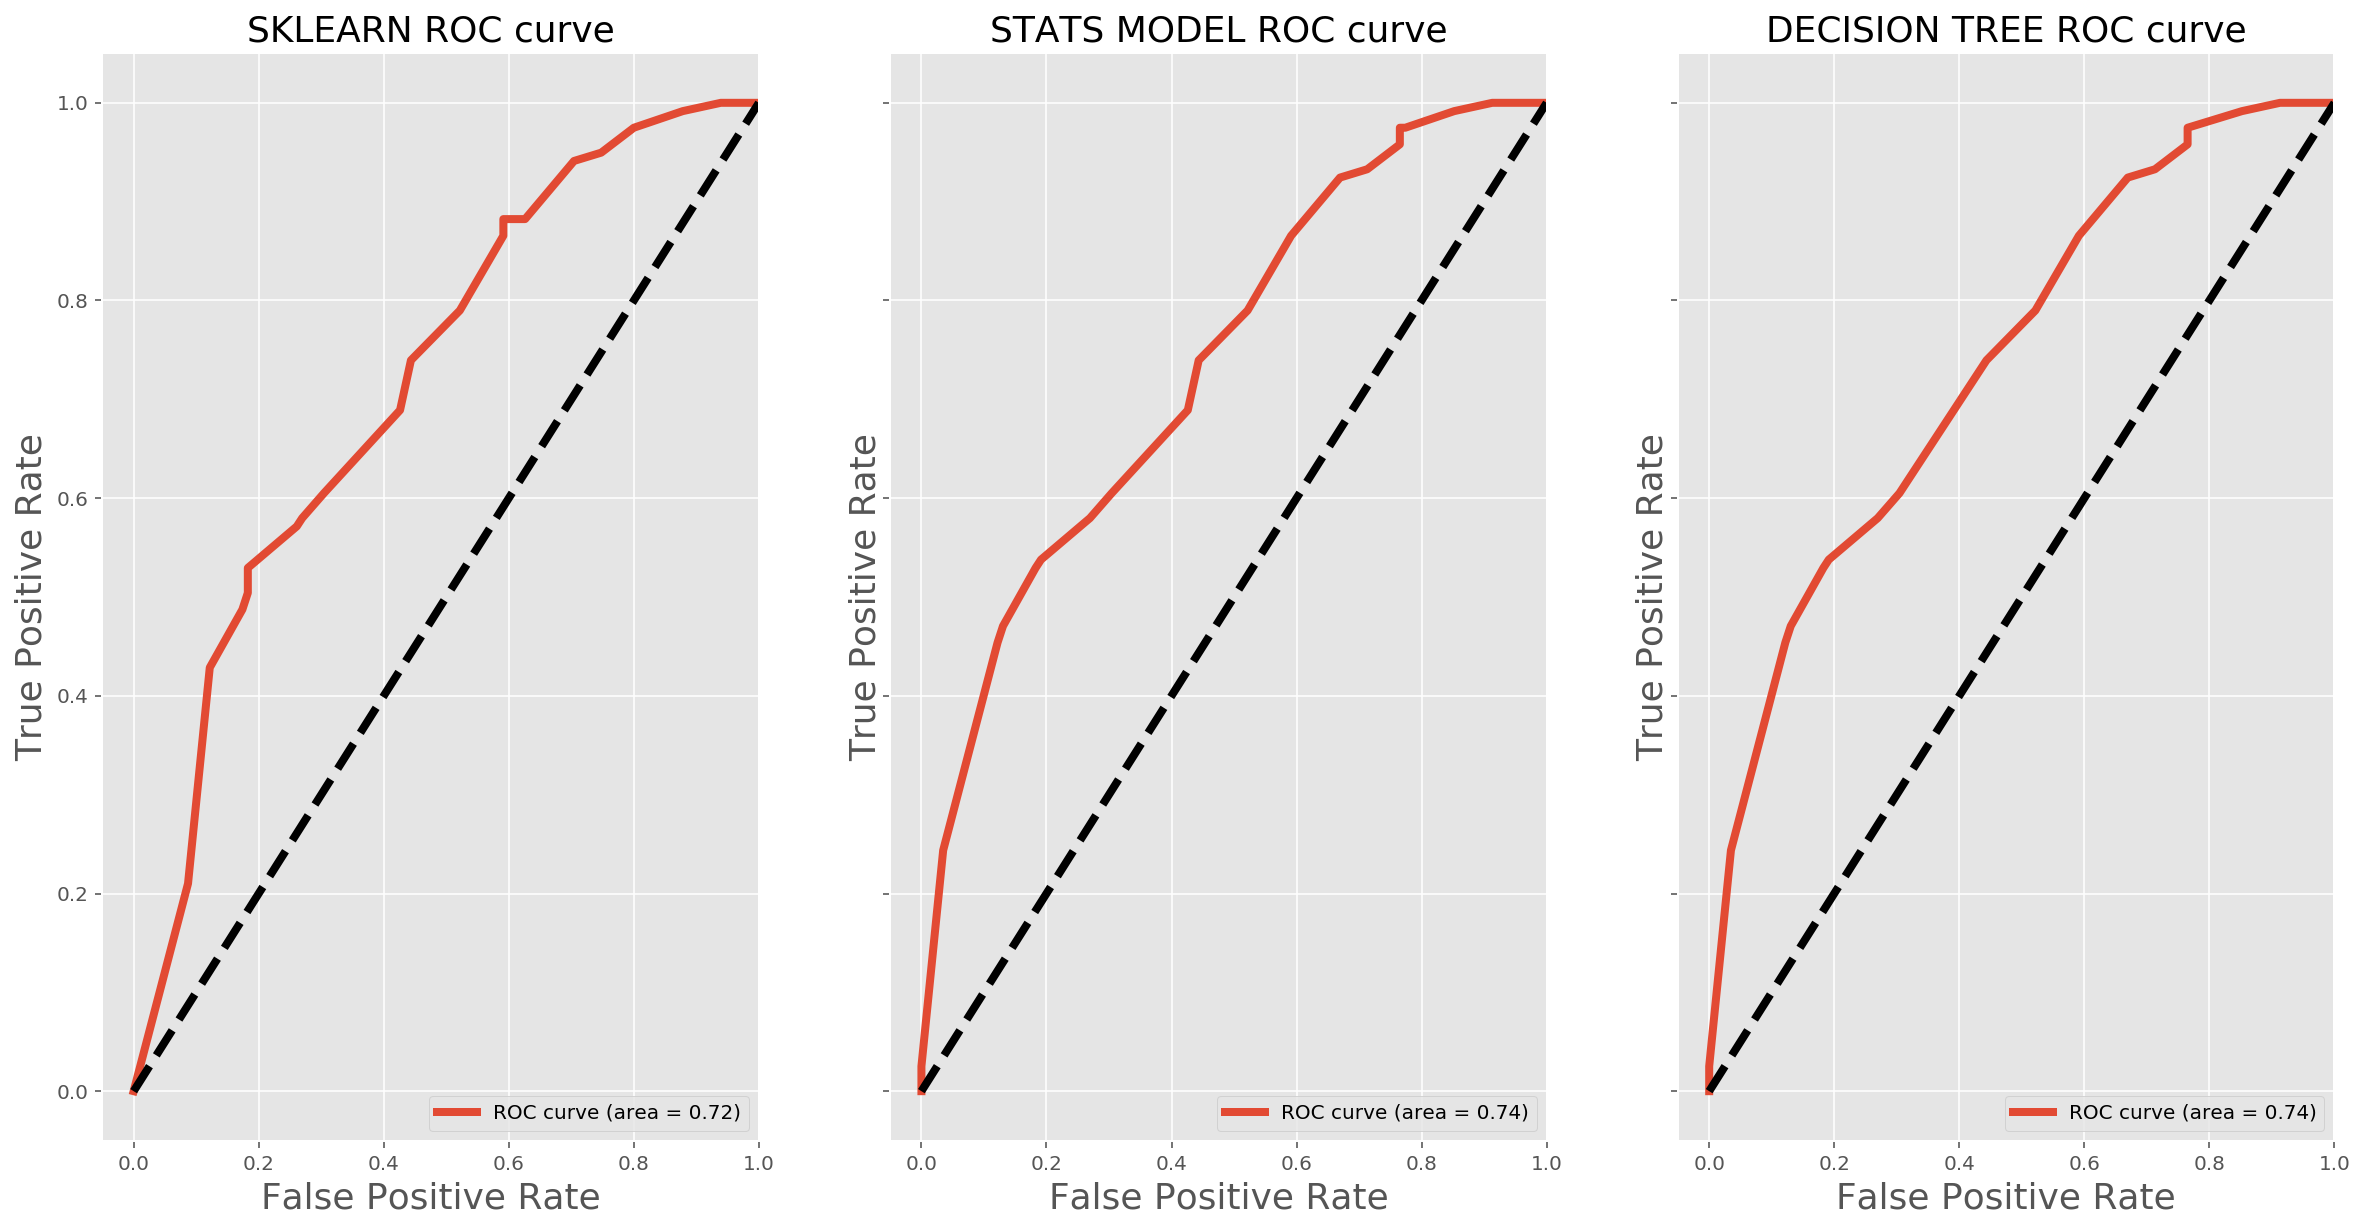

In [48]:
fig, ax= plt.subplots(ncols=3, figsize=(20,10), sharex=False, sharey=True)

plt.axes(ax[0])
plt.plot(lr_fpr, lr_tpr, label='ROC curve (area = %0.2f)' % lr_roc_auc , linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('SKLEARN ROC curve', fontsize=18)
plt.legend(loc="lower right")

plt.axes(ax[1])

# Plot of a ROC curve for class 1
plt.plot(sm_fpr, sm_tpr, label='ROC curve (area = %0.2f)' % sm_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('STATS MODEL ROC curve', fontsize=18)
plt.legend(loc="lower right")

plt.axes(ax[2])

plt.plot(dt_fpr, dt_tpr, label='ROC curve (area = %0.2f)' % dt_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('DECISION TREE ROC curve', fontsize=18)
plt.legend(loc="lower right")

plt.show()

In [49]:
#See analysis of models for commentary on graph

In [50]:
print('fpr\t', 'tpr\t', 'threshold')
print(np.array(list(zip(lr_fpr, lr_tpr, lr_threshold))))

print('fpr\t', 'tpr\t', 'threshold')
print(np.array(list(zip(sm_fpr, sm_tpr, sm_threshold))))

print('fpr\t', 'tpr\t', 'threshold')
print(np.array(list(zip(dt_fpr, dt_tpr, dt_threshold))))

fpr	 tpr	 threshold
[[0.         0.         1.65718576]
 [0.08695652 0.21008403 0.65718576]
 [0.12173913 0.42857143 0.6523628 ]
 [0.17391304 0.48739496 0.55688596]
 [0.1826087  0.50420168 0.55138563]
 [0.1826087  0.52941176 0.5424018 ]
 [0.26086957 0.57142857 0.49905345]
 [0.26956522 0.57983193 0.49351696]
 [0.30434783 0.60504202 0.49085547]
 [0.42608696 0.68907563 0.48770861]
 [0.44347826 0.7394958  0.48348413]
 [0.52173913 0.78991597 0.46013463]
 [0.59130435 0.86554622 0.45321009]
 [0.59130435 0.88235294 0.45261347]
 [0.6        0.88235294 0.44357079]
 [0.62608696 0.88235294 0.43538134]
 [0.70434783 0.94117647 0.42617167]
 [0.74782609 0.94957983 0.42477436]
 [0.8        0.97478992 0.42455748]
 [0.87826087 0.99159664 0.41927566]
 [0.93913043 1.         0.40702683]
 [0.97391304 1.         0.39326537]
 [1.         1.         0.38746492]]
fpr	 tpr	 threshold
[[0.00000000e+00 0.00000000e+00 1.88221629e+00]
 [0.00000000e+00 2.52100840e-02 8.82216294e-01]
 [3.47826087e-02 2.43697479e-01 8.1

## Analysis of models based on location
### Scores on test set
Models all had very similar accuracies, this was expected because the predictor was a single, mutually exclusive categorical variable. Test scores did vary, but this figures to be noise over signal (different test sets may have other models coming out on top).

>TEST SCORES:<br>
SKlearn Logistic regression test score: .67 <br>
Stats Model logistic regression test score: .63 <br>
Decision tree regressor test score: .65<br>


### Coefficients/ Feature importance
1. Stat Models coefficients are directly proportional to the rate of high salaries for a given city. The Queens and Aurora coefficients are significantly lower than the rest because in our train set there were 0 high salaries in either of these cities. The ranking of coefficients is closest to ranking of cities by proportion of high salary jobs in each city (for train set).
2. SKLearn model coefficients are more generalised, we can see a similar ordering but lose some information on the comparative proportion of high salary jobs between cities. Aurora is pushed up the rankings because of it's smaller sample size. 
3. Decision tree feature importance rankings are similar to the ranking of the absolute values of the SKLearn coefficients, this ranking system factors in number of samples for each city. Ordering should  be taken with a pinch of salt because the order of questions in decision tree would have 0 effect on the accuracy of the model.


### Predicted probabilities
The Roc Curves are similar for all models, meaning there is not a preferred model for if we wanted our misclassifications to tend towards over predictions.

The distribution of probabilities by city for each model vary significantly, most notably the SKLearn modeling  bunches the probabilities around .5, this is a result of the generalisation process. All three models could be used to tweak the threshold for prediction and they would still be very similar, but the scale of this tweaking is more intuitive with the decision tree and stats modeling techniques. 

### Preferred model
The difference in test score can be attributed to the small sample sizes of test set, models differ in salary prediction for cities when the proportion of high salary jobs in a city (in training set) is close to .5. For this reason I would take the Stats Model logistic regression as a preferred model, it's lower test score can be attributed to variance in the test set and the coefficients and probabilities associated with each class contain more useful information than logistic regression (SKlearn) and decision tree models offer.

##  Models using all features

### Pick thresholds

In [51]:
#25, 50 and 75 percentile of salary distribution
print(np.percentile(df.salary, 25))
print(np.percentile(df.salary, 50))
print(np.percentile(df.salary, 75))

95500.0
116500.0
133500.0


>This time we will try with multiple salary classifications. We will choose less than 95,000 for low salary, between 95,000 and 135,000 for medium salary, and above 135,000 for high salary. The choice of threshold is influenced by the 25th, 50th and 75th percentiles, and have been slightly altered to be more commercially useful(i.e we prefer a model that says x% chance you will earn over 95,000 than x% chance you will earn over 95,500)

In [52]:
#add new level categories;0 =low, 1=medium, 2=high
df['level']=[0 if i<100000 else 2 if i>140000 else 1 for i in df.salary ]

In [53]:
df.head()

title  location    company    salary  level
0                  Data Scientist   Redmond    Coso IT  115000.0      1
1                  Data Scientist   Redmond   Facebook  114000.0      1
2       Data Scientist, Analytics   Seattle   Facebook  148000.0      2
3  Data Scientist / Data Engineer  Bellevue    Thunder  128500.0      1
4                  Data Scientist   Seattle  TenPoint7  130500.0      1

### Clean data

In [54]:
# Clean up titles by making all lower case and and making synonms and abbreviations equal
def replace_words(title):
    title=title.lower()
    title=title.replace('scientist', 'science')
    title=title.replace('senior', 'sr')
    title=title.replace('machine learning', 'ml')
    title=title.replace('natural language processing', 'nlp')
    title=title.replace('artificial intelligence', 'ai')
    title=title.replace('analyst', 'analysis')
    title=title.replace('analytics', 'analysis')
    title=title.replace('director', 'manager')
    title=title.replace('head', 'manager')
    title=title.replace('mgr', 'manager')
    title=title.replace('analytics', 'analysis')
    title=title.replace('department','dept')
    title=title.replace('researcher','research')
    title=title.replace('/',' ')
    title=title.replace('.',' ')
    return title

df['title']=[replace_words(title) for title in df.title]
df['company']=[replace_words(company) for company in df.company]


In [55]:
#Categorise jobs
#These categories are chosen by checking value_counts for each company
#it's a bit of guess work that could be improved on with further analysis 
#or bigger data sets
def company_type(company, key_words):
    x=company.split(' ')
    y=0
    for word in x:
        if word in key_words:
            y=y+1
    return (y>0)*1
        
#education job if university, college or research in company
df['education']=[company_type(i, ['university','college','research']) for i in df.company]

#public job if department or US in company
df['public']=[company_type(i, ['dept','us']) for i in df.company]

#brand_name if company is well known brand
big_hitters=['uber ','microsoft','facebook','spotify','google','twitter','kpmg','deloitte','boeing','pepsico' ]
df['brand_name']=[company_type(i, big_hitters) for i in df.company]

#considered making a health label too but cancer, disease and health have a lot of overlap
#with education key words, the two labels would be very correlated

The job titles are now in a consistent language that will make it easier to identify patterns.
The companies have been assigned a category (education, public, brand_name or other) based on words featured in their company name.

Identifying important features (words) in job titles could be done manually, identifying words like data, science, NL, engineer etc in job titles, but this is cumbersome and our ability to identify features is proportional to how often they appear in the entire corpus. Instead we can vectorise the words, including only the more common ones featured (up to a threshold). 

When establishing the effect company has on price we now have the option of dummifying/vectorising the company, using the categories we created, or both. We will try using only our categories first.

In [56]:
#collect all words in title column
all_words=''
for title in df.title:
    all_words=all_words+' '+title
    

In [57]:
#fit vectorises to train title corpus
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvec = CountVectorizer(stop_words='english')
cvec.fit([all_words])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [58]:
#find unique word count and inspect top counts
document_matrix = cvec.transform([all_words])

df_words = pd.DataFrame(cvec.transform([all_words]).todense(),
                  columns=cvec.get_feature_names(), 
                       index=['count'])

print('number of unique words:',df_words.T.sort_values(by='count', ascending=False).shape[0])
df_words.T.sort_values(by='count', ascending=False).head(15)

number of unique words: 759


count
data           633
science        599
engineer       289
software       176
sr             149
analysis       144
research       114
manager        109
systems         48
developer       47
ml              42
architect       38
engineering     36
consultant      34
associate       32

In [59]:
#Setting up predictor and target data frames...
    ##To test with vectorising company name also:hash out line 11 and unhash line 26 and 27
    ##To test with tf-id: hash out line 22, unhash  line 23

#extract target variable
y= df['level']

#drop target column from predictor df
df_2=df.drop('level', axis=1)
#drop company column (relying on company categories instead)
df_2=df_2.drop('company', axis=1)
#drop salary column
df_2=df_2.drop('salary', axis=1)


#get dummies for location
df_2=pd.get_dummies(df_2, columns=['location'], drop_first=False)


#vectorise words- take only top 100 most featured words
#initialise vector
cvec = CountVectorizer(stop_words='english', max_features=1000)
#cvec=TfidfVectorizer(stop_words='english', max_features=1000)
cvec.fit([all_words])
#remove column to be vectorised, vectorise it

#df_2['title']=[df_2['title'][i]+' '+df_2['company'][i] for i in range(df_2.shape[0])]
#df_2.pop('company')

title=df_2.pop('title')
vectorised=pd.DataFrame(cvec.transform(title).todense(), columns=cvec.get_feature_names())
#join dataframes back together
df_2=pd.concat([df_2, vectorised], axis=1)

#assign predictor to X
X=df_2

print('Number of rows:',X.shape[0])
print('Number of variables:',X.shape[1])

#train-test split, use same random state as location only models
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2, stratify=y, shuffle=True ,random_state=1)

Number of rows: 1170
Number of variables: 787


I did some tweaking with the above code and ran the models below a few times:<br>
 >Adding company names to hashed words did not improve best model score<br>
    Taking max words up to all words did improve best model score<br>
    Using TF-ID vectoriser did not improve best model score


### Modelling...

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [61]:
dt_params = {
    'max_depth': [5, 10, 15, None ],
    'min_samples_split': [2,5,10],
    'max_features':[.5,.75, .9, 1.0],
    'random_state':[1]}
dt=DecisionTreeClassifier()
dt_gridsearch = GridSearchCV(dt,
                              dt_params,
                              n_jobs=2, 
                              cv=4, 
                              verbose=0, 
                              return_train_score=True)

dt_gridsearch.fit(X_train, y_train)

print('Best params:',dt_gridsearch.best_params_)
print('Train score:',dt_gridsearch.score(X_train,y_train))
print('Test score:',dt_gridsearch.score(X_test, y_test))

pd.DataFrame(dt_gridsearch.cv_results_).sort_values(by='rank_test_score').head()


Best params: {'max_depth': 15, 'max_features': 0.75, 'min_samples_split': 2, 'random_state': 1}
Train score: 0.8835470085470085
Test score: 0.6752136752136753


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
29       0.011052      0.000876         0.001160        0.000020   
27       0.010610      0.000639         0.001153        0.000008   
28       0.010350      0.000444         0.001143        0.000034   
17       0.009090      0.000493         0.001151        0.000027   
22       0.011082      0.001208         0.001134        0.000019   

   param_max_depth param_max_features param_min_samples_split  \
29              15               0.75                      10   
27              15               0.75                       2   
28              15               0.75                       5   
17              10               0.75                      10   
22              10                  1                       5   

   param_random_state                                             params  \
29                  1  {'max_depth': 15, 'max_features': 0.75, 'min_s...   
27                  1  {'max_depth': 15, 'max_features': 0.75, 'min_s...   
28                  1  {'max_depth': 15, 'max_features': 0.75, 'min_s...   
17                  1  {'max_depth': 10, 'max_features': 0.75, 'min_s...   
22                  1  {'max_depth': 10, 'max_features': 1.0, 'min_sa...   

    split0_test_score       ...         split3_test_score  mean_test_score  \
29           0.676596       ...                  0.708155         0.688034   
27           0.693617       ...                  0.708155         0.688034   
28           0.685106       ...                  0.690987         0.686966   
17           0.676596       ...                  0.712446         0.684829   
22           0.668085       ...                  0.699571         0.683761   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
29        0.012593                1            0.814551            0.803138   
27        0.013962                1            0.841655            0.860200   
28        0.002404                3            0.831669            0.845934   
17        0.016695                4            0.756063            0.751783   
22        0.012239                5            0.823110            0.784593   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
29            0.847795            0.834993          0.825119         0.017368  
27            0.889047            0.876245          0.866787         0.017748  
28            0.871977            0.859175          0.852189         0.015005  
17            0.809388            0.796586          0.778455         0.024992  
22            0.810811            0.789474          0.801997         0.015678  

[5 rows x 22 columns]

In [62]:
lr_params = {'penalty': ['l1', 'l2'],
             'solver': ['liblinear'],
             'C': np.logspace(-4, 4, 10),
            }
lr=LogisticRegression()
lr_gridsearch  = GridSearchCV(lr,
                              lr_params,
                              n_jobs=2, 
                              cv=4, 
                              verbose=0, 
                              return_train_score=True)

lr_gridsearch.fit(X_train, y_train)

print('Best params:',lr_gridsearch.best_params_)
print('Train score:',lr_gridsearch.score(X_train,y_train))
print('Test score:',lr_gridsearch.score(X_test, y_test))

pd.DataFrame(lr_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

Best params: {'C': 2.782559402207126, 'penalty': 'l2', 'solver': 'liblinear'}
Train score: 0.8760683760683761
Test score: 0.7051282051282052


mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
11       0.008460      0.000143         0.001280        0.000104   2.78256   
9        0.008618      0.001405         0.001282        0.000036  0.359381   
10       0.013451      0.000508         0.001168        0.000012   2.78256   
13       0.011620      0.001024         0.001235        0.000058   21.5443   
8        0.009165      0.001195         0.001331        0.000054  0.359381   

   param_penalty param_solver  \
11            l2    liblinear   
9             l2    liblinear   
10            l1    liblinear   
13            l2    liblinear   
8             l1    liblinear   

                                               params  split0_test_score  \
11  {'C': 2.782559402207126, 'penalty': 'l2', 'sol...           0.714894   
9   {'C': 0.3593813663804626, 'penalty': 'l2', 'so...           0.697872   
10  {'C': 2.782559402207126, 'penalty': 'l1', 'sol...           0.706383   
13  {'C': 21.54434690031882, 'penalty': 'l2', 'sol...           0.702128   
8   {'C': 0.3593813663804626, 'penalty': 'l1', 'so...           0.672340   

    split1_test_score       ...         split3_test_score  mean_test_score  \
11           0.693617       ...                  0.716738         0.713675   
9            0.693617       ...                  0.729614         0.709402   
10           0.676596       ...                  0.716738         0.706197   
13           0.672340       ...                  0.690987         0.699786   
8            0.689362       ...                  0.721030         0.696581   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
11        0.012921                1            0.877318            0.884451   
9         0.014527                2            0.768902            0.783167   
10        0.018404                3            0.895863            0.885877   
13        0.022351                4            0.920114            0.920114   
8         0.017961                5            0.711840            0.720399   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
11            0.890469            0.881935          0.883543         0.004747  
9             0.783784            0.780939          0.779198         0.006038  
10            0.901849            0.884780          0.892092         0.007098  
13            0.923186            0.917496          0.920228         0.002015  
8             0.715505            0.716927          0.716168         0.003068  

[5 rows x 21 columns]

In [63]:
knn_params = {'n_neighbors': [1, 3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan'],}

knn=KNeighborsClassifier()
knn_gridsearch  = GridSearchCV(knn,
                              knn_params,
                              n_jobs=2, 
                              cv=4, 
                              verbose=0, 
                              return_train_score=True)

knn_gridsearch.fit(X_train, y_train)

print('Best params:',knn_gridsearch.best_params_)
print('Train score:',knn_gridsearch.score(X_train,y_train))
print('Test score:',knn_gridsearch.score(X_test, y_test))

pd.DataFrame(knn_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

Best params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Train score: 0.7393162393162394
Test score: 0.6709401709401709


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
20       0.015658      0.003626         0.175603        0.005526    manhattan   
8        0.013692      0.000410         0.178453        0.001742    euclidean   
21       0.014498      0.001427         0.177553        0.008829    manhattan   
22       0.018182      0.003125         0.182846        0.008863    manhattan   
10       0.016940      0.001251         0.197254        0.002134    euclidean   

   param_n_neighbors param_weights  \
20                 9       uniform   
8                  9       uniform   
21                 9      distance   
22                11       uniform   
10                11       uniform   

                                               params  split0_test_score  \
20  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...           0.719149   
8   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...           0.719149   
21  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...           0.693617   
22  {'metric': 'manhattan', 'n_neighbors': 11, 'we...           0.693617   
10  {'metric': 'euclidean', 'n_neighbors': 11, 'we...           0.693617   

    split1_test_score       ...         split3_test_score  mean_test_score  \
20           0.655319       ...                  0.695279         0.697650   
8            0.655319       ...                  0.695279         0.697650   
21           0.663830       ...                  0.703863         0.696581   
22           0.672340       ...                  0.669528         0.689103   
10           0.672340       ...                  0.669528         0.689103   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
20        0.026522                1            0.718973            0.720399   
8         0.026522                1            0.721826            0.720399   
21        0.022144                3            0.965763            0.972896   
22        0.020611                4            0.707561            0.718973   
10        0.020611                4            0.707561            0.718973   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
20            0.732575            0.722617          0.723641         0.005319  
8             0.733997            0.722617          0.724710         0.005421  
21            0.967283            0.968706          0.968662         0.002657  
22            0.714083            0.712660          0.713319         0.004066  
10            0.714083            0.711238          0.712963         0.004169  

[5 rows x 21 columns]

In [64]:
from statsmodels.discrete.discrete_model import MNLogit

In [65]:
#add column of 1's for fit intercept
Xs_train=X_train.copy()
Xs_test=X_test.copy()
Xs_train['intercept']=[1 for number in range(X_train.shape[0])]
Xs_test['intercept']=[1 for number in range(X_test.shape[0])]

#Run Statsmodel
stat_log=MNLogit(y_train, Xs_train).fit(method='lbfgs', maxiter=100)
print('Training score:',((stat_log.predict(Xs_train).idxmax(axis=1)==y_train)*1).mean())
print('Test score: ',((stat_log.predict(Xs_test).idxmax(axis=1)==y_test)*1).mean())



Training score: 0.9273504273504274
Test score:  0.6538461538461539


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Attempt to make improvements with bagging classifier

In [66]:
from sklearn.ensemble import BaggingClassifier

In [67]:
#TAKE VERY LONG TO RUN AND WASN'T THE BEST

#bag_params = {'base_estimator': [KNeighborsClassifier(metric=knn_gridsearch.best_params_['metric'],
#                                                     n_neighbors=knn_gridsearch.best_params_['n_neighbors'],
#                                                     weights=knn_gridsearch.best_params_['weights'])],
#             'n_estimators': [10,20,50],
#             'max_features': [0.7,.8,.9,.95,1.0],
#              'random_state':[1]
#            }
#bag=BaggingClassifier()
#bag_gridsearch  = GridSearchCV(bag,
#                              bag_params,
#                              n_jobs=2, 
#                              cv=4, 
#                              verbose=0, 
#                              return_train_score=True)

#bag_gridsearch.fit(X_train, y_train)

#print('Best params:',bag_gridsearch.best_params_)
#print('Train score:',bag_gridsearch.score(X_train,y_train))
#print('Test score:',bag_gridsearch.score(X_test, y_test))

#pd.DataFrame(bag_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

In [68]:
bag_params = {'base_estimator': [LogisticRegression(C=2.782559402207126,penalty= 'l2', solver= 'liblinear')],
             'n_estimators': [10,20,50,100],
             'max_features': [0.7,.8,.9,.95,1.0],
              'random_state':[1]
            }
bag=BaggingClassifier()
bag_gridsearch  = GridSearchCV(bag,
                              bag_params,
                              n_jobs=2, 
                              cv=4, 
                              verbose=0, 
                              return_train_score=True)

bag_gridsearch.fit(X_train, y_train)

print('Best params:',bag_gridsearch.best_params_)
print('Train score:',bag_gridsearch.score(X_train,y_train))
print('Test score:',bag_gridsearch.score(X_test, y_test))

pd.DataFrame(bag_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

Best params: {'base_estimator': LogisticRegression(C=2.782559402207126, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False), 'max_features': 1.0, 'n_estimators': 50, 'random_state': 1}
Train score: 0.8579059829059829
Test score: 0.7136752136752137


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
18       0.325659      0.002390         0.031364        0.000408   
19       0.678615      0.011771         0.067687        0.006706   
7        0.599302      0.006496         0.059051        0.002938   
14       0.337500      0.004145         0.039911        0.001911   
10       0.310816      0.005898         0.041137        0.000836   

                                 param_base_estimator param_max_features  \
18  LogisticRegression(C=2.782559402207126, class_...                  1   
19  LogisticRegression(C=2.782559402207126, class_...                  1   
7   LogisticRegression(C=2.782559402207126, class_...                0.8   
14  LogisticRegression(C=2.782559402207126, class_...               0.95   
10  LogisticRegression(C=2.782559402207126, class_...                0.9   

   param_n_estimators param_random_state  \
18                 50                  1   
19                100                  1   
7                 100                  1   
14                 50                  1   
10                 50                  1   

                                               params  split0_test_score  \
18  {'base_estimator': LogisticRegression(C=2.7825...           0.706383   
19  {'base_estimator': LogisticRegression(C=2.7825...           0.714894   
7   {'base_estimator': LogisticRegression(C=2.7825...           0.719149   
14  {'base_estimator': LogisticRegression(C=2.7825...           0.727660   
10  {'base_estimator': LogisticRegression(C=2.7825...           0.723404   

         ...         split3_test_score  mean_test_score  std_test_score  \
18       ...                  0.712446         0.716880        0.017600   
19       ...                  0.708155         0.715812        0.016516   
7        ...                  0.716738         0.715812        0.011456   
14       ...                  0.699571         0.715812        0.015146   
10       ...                  0.703863         0.715812        0.013361   

    rank_test_score  split0_train_score  split1_train_score  \
18                1            0.848787            0.858773   
19                2            0.854494            0.865906   
7                 2            0.843081            0.843081   
14                2            0.854494            0.850214   
10                2            0.845934            0.850214   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
18            0.863442            0.860597          0.857900         0.005518  
19            0.867710            0.862020          0.862532         0.005076  
7             0.847795            0.847795          0.845438         0.002357  
14            0.864865            0.850640          0.855053         0.005905  
10            0.859175            0.849218          0.851135         0.004904  

[5 rows x 22 columns]

In [69]:
bag_params = {'n_estimators': [10,20,50,100],
             'max_features': [0.7,.8,.9,.95,1.0],
              'random_state':[1]
            }
bag=BaggingClassifier()
bag_gridsearch  = GridSearchCV(bag,
                              bag_params,
                              n_jobs=2, 
                              cv=4, 
                              verbose=0, 
                              return_train_score=True)

bag_gridsearch.fit(X_train, y_train)

print('Best params:',bag_gridsearch.best_params_)
print('Train score:',bag_gridsearch.score(X_train,y_train))
print('Test score:',bag_gridsearch.score(X_test, y_test))

pd.DataFrame(bag_gridsearch.cv_results_).sort_values(by='rank_test_score').head()

Best params: {'max_features': 0.7, 'n_estimators': 100, 'random_state': 1}
Train score: 0.9572649572649573
Test score: 0.7051282051282052


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       0.798065      0.018946         0.036383        0.005561   
2       0.383794      0.008879         0.018452        0.003247   
6       0.495650      0.019229         0.030103        0.002844   
5       0.199148      0.016383         0.011306        0.001000   
1       0.167562      0.004635         0.010067        0.002104   

  param_max_features param_n_estimators param_random_state  \
3                0.7                100                  1   
2                0.7                 50                  1   
6                0.8                 50                  1   
5                0.8                 20                  1   
1                0.7                 20                  1   

                                              params  split0_test_score  \
3  {'max_features': 0.7, 'n_estimators': 100, 'ra...           0.719149   
2  {'max_features': 0.7, 'n_estimators': 50, 'ran...           0.719149   
6  {'max_features': 0.8, 'n_estimators': 50, 'ran...           0.697872   
5  {'max_features': 0.8, 'n_estimators': 20, 'ran...           0.689362   
1  {'max_features': 0.7, 'n_estimators': 20, 'ran...           0.702128   

   split1_test_score       ...         split3_test_score  mean_test_score  \
3           0.706383       ...                  0.729614         0.713675   
2           0.702128       ...                  0.716738         0.710470   
6           0.693617       ...                  0.738197         0.710470   
5           0.693617       ...                  0.755365         0.709402   
1           0.689362       ...                  0.729614         0.705128   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
3        0.011560                1            0.960057            0.962910   
2        0.007552                2            0.958631            0.961484   
6        0.017421                2            0.964337            0.968616   
5        0.026708                4            0.958631            0.962910   
1        0.014886                5            0.951498            0.957204   

   split2_train_score  split3_train_score  mean_train_score  std_train_score  
3            0.963016            0.964438          0.962605         0.001590  
2            0.958748            0.958748          0.959403         0.001202  
6            0.964438            0.963016          0.965102         0.002105  
5            0.960171            0.960171          0.960471         0.001542  
1            0.955903            0.960171          0.956194         0.003121  

[5 rows x 21 columns]

## Evaluation of best model



Having run logistic regression (SKlearn and stats model), K nearest neighbour,  decision tree, and logistic regression (SKlearn), K nearest neighboor and decision tree with bagging we conclude that logistic regression with bagging is the best performing model to predict low/medium/high salary given our training/test data. 

Grid search with cross validation was used to identify the optimal parameters of each model, test set score was as metric to define best model,this is because our sample is small and there is a lot of variation between CV scores for different random states. Given this, to truly score our model, we must acquire more unseen data to test on.

It would be interesting to see the salaries associated with incorrect predictions. If they lie close to our salary bin thresholds it may indicate that picking different thresholds will improve our model further

In [70]:
#Construct best linear regression model
lr_bag=BaggingClassifier(LogisticRegression(C=2.782559402207126,penalty= 'l2', solver= 'liblinear'),
                         max_features=1.0, n_estimators= 50, random_state=1)
                         
lr_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=2.782559402207126, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [71]:
#Test score
lr_bag.score(X_test, y_test)

0.7136752136752137

In [72]:
#create dataframe, 1=True prediction, 0=False prediction
test_predictions=pd.DataFrame((lr_bag.predict(X_test)==y_test)*1)

#Extract index of false predictions
incorrect_index=test_predictions[test_predictions.level==0].index

correct_index=test_predictions[test_predictions.level==1].index

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


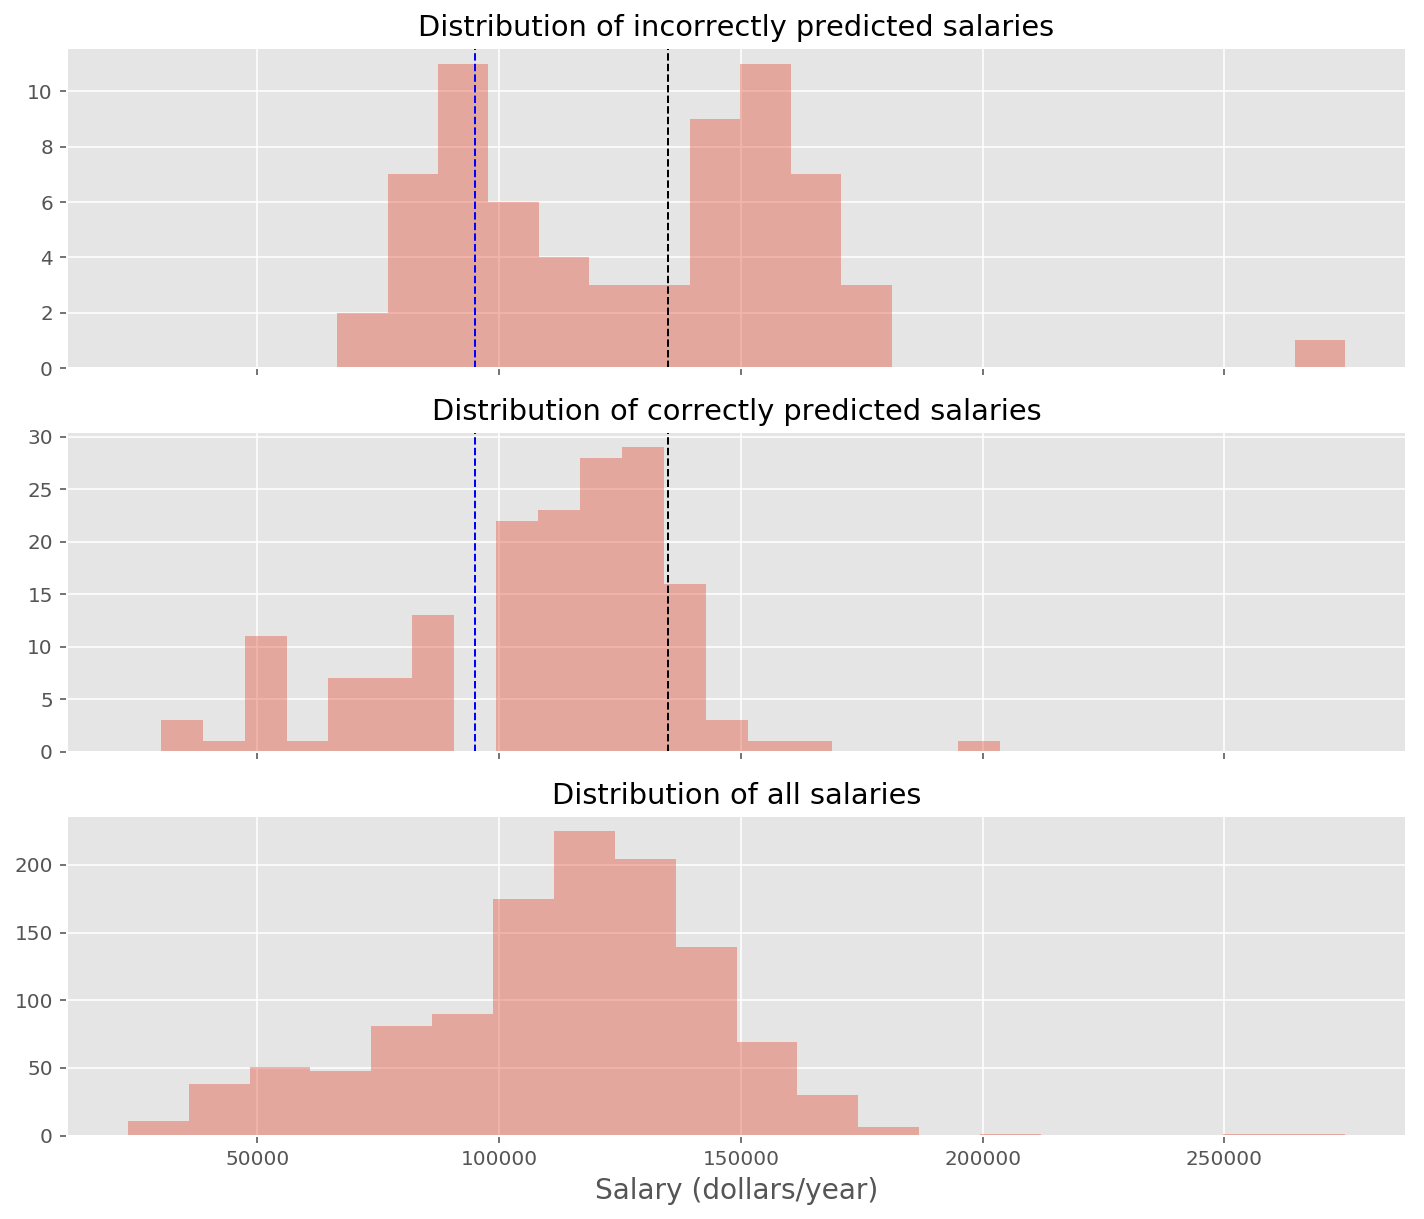

In [73]:
#Plot salary distribution of incorrect, correct and all predictions
fig, ax= plt.subplots(nrows=3, figsize=(12,10), sharex=True)

bins = 20

plt.axes(ax[0])
sns.distplot(df.loc[incorrect_index,:]['salary'], kde=False, bins=20)
ax[0].set_title('Distribution of incorrectly predicted salaries')
ax[0].set_xlabel('\n',fontsize=14)

ax[0].axvline(95000, ls='dashed', lw=1, color='b',
           alpha=1, label='Low/medium threshold')

ax[0].axvline(135000, ls='dashed', lw=1, color='black',
           alpha=1, label='Medium/high threshold')

plt.axes(ax[1])
sns.distplot(df.loc[correct_index,:]['salary'], kde=False, bins=20)
ax[1].set_title('Distribution of correctly predicted salaries')
ax[1].set_xlabel('\n',fontsize=14)

ax[1].axvline(95000, ls='dashed', lw=1, color='b',
           alpha=1, label='Low/medium threshold')

ax[1].axvline(135000, ls='dashed', lw=1, color='black',
           alpha=1, label='Medium/high threshold')

plt.axes(ax[2])
sns.distplot(df['salary'], kde=False, bins=20)
ax[2].set_xlabel('Salary (dollars/year)',fontsize=14)
ax[2].set_title('Distribution of all salaries')

plt.show()




The incorrect predictions tend towards the threshold salary, and their distribution is distinct from the overall distribution of salaries. This gives us another way to measure the mistakes in our model, and is informative if somebody wanted to know the average $ amount away from the lower bound of the stated salary threshold the misclassifications (too high) were.

The distinct lack of correct predictions around the low/medium threshold salary indicate the model could be improved by picking a different salary threshold. 

Visualisation could be improved by subsetting incorrect predictions by prediction made and plotting the three distributions.

A quick fix to our over estimations...tell customers the thresholds are lower than the modeled ones, i.e. our definition of medium salary was 95,000 to 135,000, tell the customer the actual range is 90,000 to 135,000; in this case we wouldn't have lost any correct predictions, but we would correct a few predictions that are over estimates.

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [75]:
predictions = lr_bag.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[0, 1, 2])
confusion_df=pd.DataFrame(confusion, columns=['predict_low','predict_medium','predict_high'],
            index=['is_low','is_medium','is_high'])
confusion_df

predict_low  predict_medium  predict_high
is_low              43              22             1
is_medium            6             117             7
is_high              0              31             7

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        66
           1       0.69      0.90      0.78       130
           2       0.47      0.18      0.26        38

   micro avg       0.71      0.71      0.71       234
   macro avg       0.68      0.58      0.60       234
weighted avg       0.71      0.71      0.69       234



We have a preference for under predicting salary bands (for commercial reasons). For this reason we hope for high precision for class 2 (high salary)  (as every incorrect prediction of high is an over prediction). Also want high recall for class 0 (as low recall implies high frequency of low salary predicted as higher salary).

If this were a binary classification model and we want to tend towards under predicting salary then we should seek high precision for class 0 or high recall for class 1.

In [77]:
print('Rate of over estimated salary level in model: ',
      (confusion_df.iloc[0,1:].sum()+confusion_df.iloc[1,2].sum())/(confusion_df.sum().sum()))


Rate of over estimated salary level in model:  0.1282051282051282


In [78]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl",3))

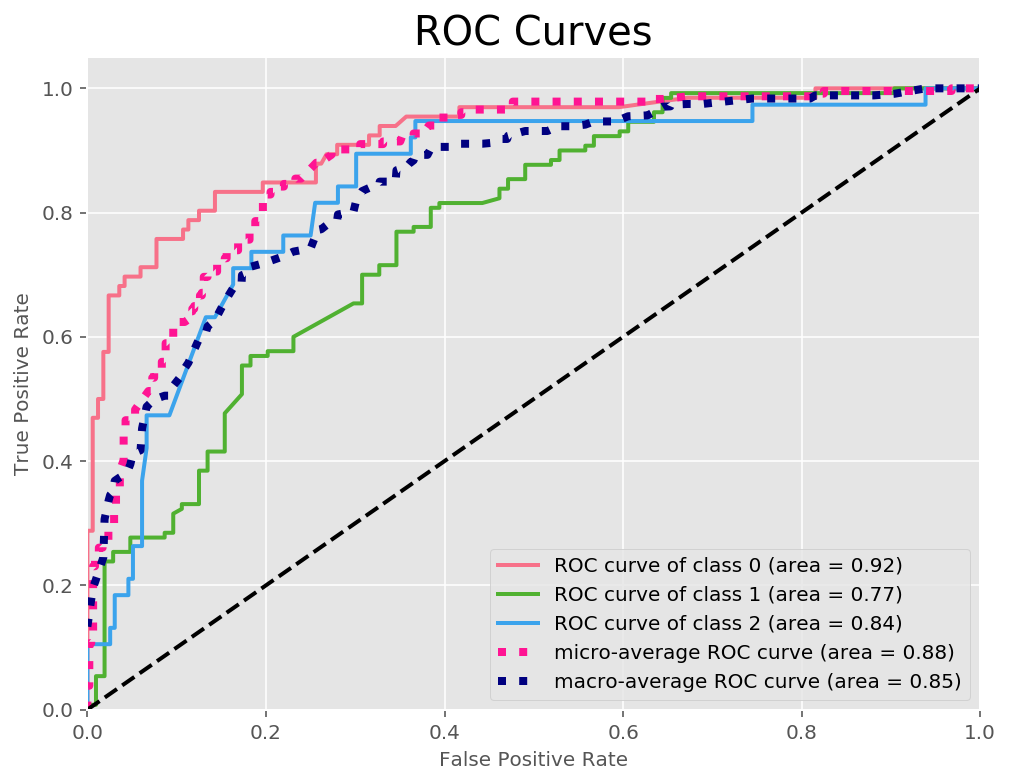

In [79]:
skplt.metrics.plot_roc(y_test, pd.DataFrame(lr_bag.predict_proba(X_test)), plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=10, figsize=(8,6), cmap=cmap)
plt.show()

The roc curves show how accurate each of the binary classification models are (multiple logistic regression is a collection of binary classification models). We classify lower salaries with the highest accuracy, then medium, then high. One of the reasons for this is the skew in the distribution of salaries, low salaries have a wider spread (in dollar terms) and so are easier to classify correctly. 

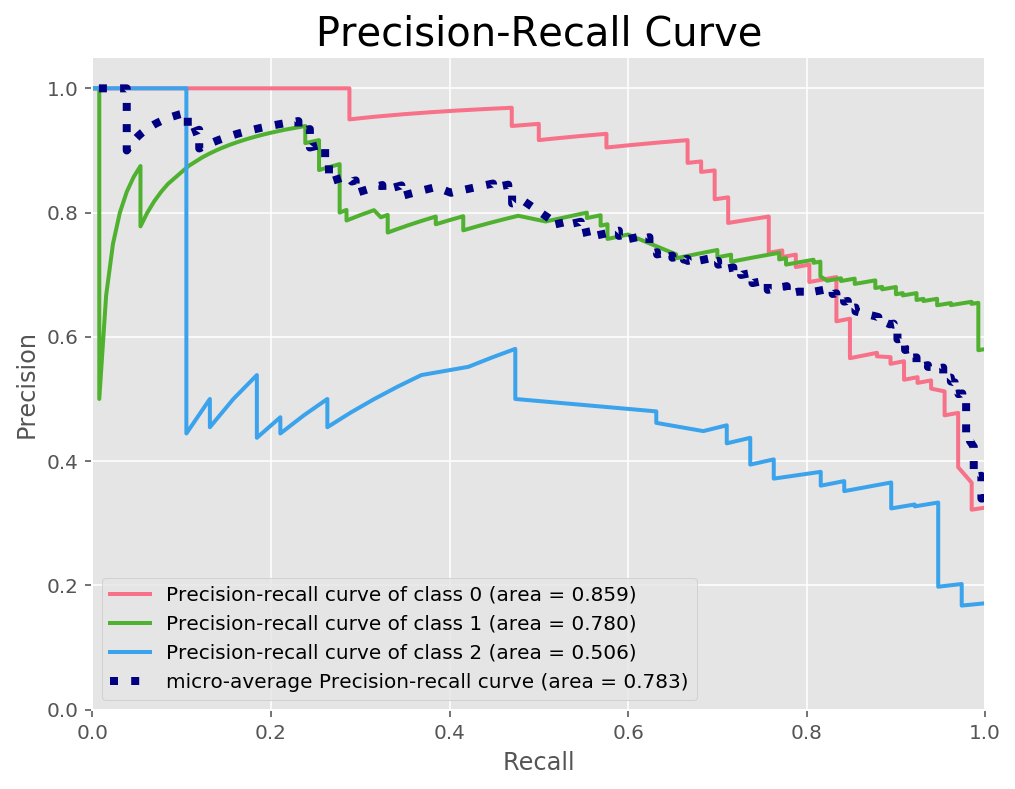

In [80]:
skplt.metrics.plot_precision_recall(y_test, pd.DataFrame(lr_bag.predict_proba(X_test)), 
                                    plot_micro=True, title_fontsize=20, text_fontsize=10,
                                    figsize=(8,6),cmap=cmap)
plt.show()

Here we can see the trade offs that have to be made when searching for highest precision rate for class 2 and highest recall rate for class 0  (can't have both!).

## Summary: process from start to finish (model with all features)

### Gathering data:
1. Scrape job listings from indeed.com
2. Write and use helper function to extract salary, location, company and job title for each job listing.
3. Clean extracted data (remove nan's/ create salary from range / drop surplus location data)

### EDA:
1. Investigate distribution of salaries.

### Feature engineering:
1. Pick salary bins (informed by EDA)
2. Clean job title data (make synonyms/abbreviations equal, lower case all words, remove punctuation that connects two words).
3. Engineer features (vectorise words in job title, manually create job categories using company name)

### Models tested:
All models (except stats model logistic regression) were tested using a grid search with cross validation (allowing for optimal parameters to be chosen for each model). The following models were tested:
1. Decision tree classifier
2. Logistic regression (SKlearn)
3. K Nearest neighbour 
4. Logistic regression (stats models)
5. Decision tree classifier (with bagging)
5. Logistic regression (with bagging)
6. K Nearest neighbour  (with bagging)

### Identify best model:
The logistic regression with bagging was the best model, it had a score of .71 on test data. Because our sample was small we prefer rating model on best test score as opposed to best CV score (a lot of variance in CV scores, and not all models had CV scores).

### Evaluate best model:
1. Check salary distributions of incorrect and correct predictions, evaluate if performance can be improved by picking different thresholds.
2. Produce confusion matrix, classification report, establish frequency of over predictions (12%).
3. Produce ROC and precision/recall curves.

### Improvements to be made:
1. EDA could have went into more detail.
1. More work can be done on classifying companies (industry etc).
2. Dropping everything but city from location data is a mistake, it may not have hurt this model but could prevent us from scaling up in future. Never chuck away data!
3. Repeat modeling with more/ different salary bins.
4. Scrape more data! In hindsight we should have aimed for 10 scrapes, only did 4. Should have also expanded the list of cities. In future make schedule for data collection at start of project.
5. Consider the commercial implications of model for further improvements.
6. Further analysis of precision/recall curves, ROC curves, confusion matrix and classification reports to understand the distribution of misclassifications for each model (gives the opportunity to consider a less accurate model as commercially optimal when underestimates are preferred when misclassifying).
7. Evaluate feature importance of each binary classification that makes up multinomial classification model.





#### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

## Comparing misclassification between models 
### Decision tree bagging vs logistic regression bagging

In [81]:
#Construct best decision tree regression model
dt_bag=BaggingClassifier(max_features=0.7, n_estimators= 100, random_state=1)
                         
dt_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.7, max_samples=1.0,
         n_estimators=100, n_jobs=None, oob_score=False, random_state=1,
         verbose=0, warm_start=False)

In [82]:
#model score on test set
dt_bag.score(X_test, y_test)

0.7051282051282052

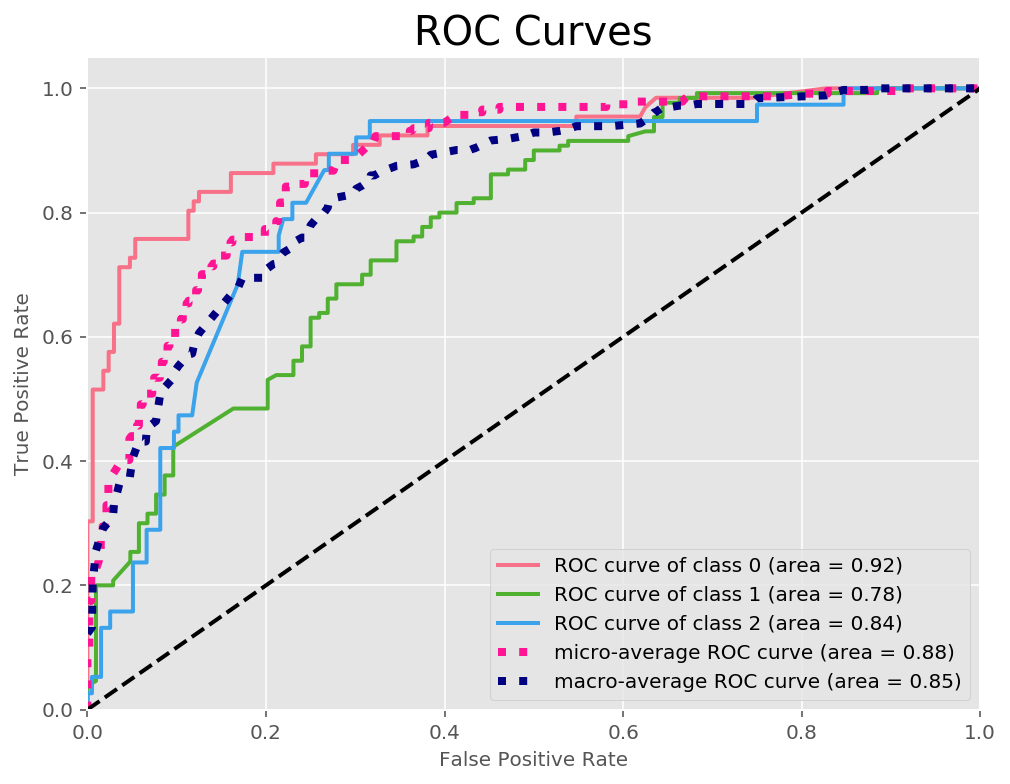

In [83]:
skplt.metrics.plot_roc(y_test, pd.DataFrame(dt_bag.predict_proba(X_test)), plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=10, figsize=(8,6), cmap=cmap)
plt.show()

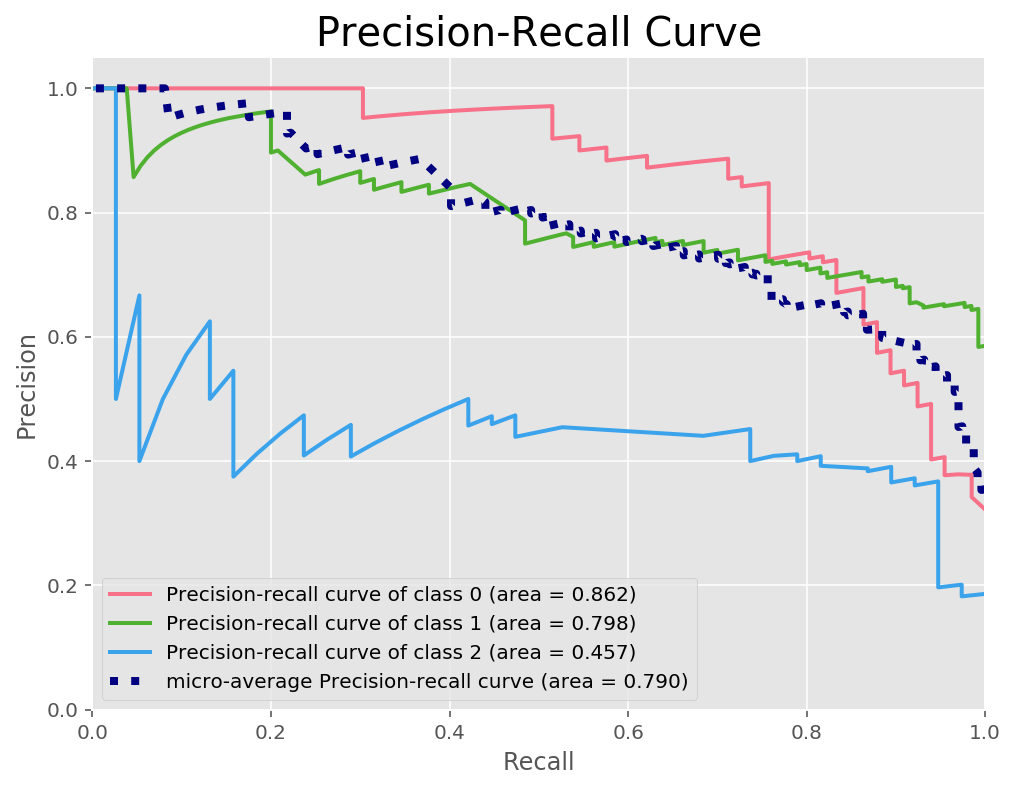

In [84]:
skplt.metrics.plot_precision_recall(y_test, pd.DataFrame(dt_bag.predict_proba(X_test)), 
                                    plot_micro=True, title_fontsize=20, text_fontsize=10,
                                    figsize=(8,6),cmap=cmap)
plt.show()

In [85]:
predictions = dt_bag.predict(X_test)
confusion = confusion_matrix(y_test, predictions, labels=[0, 1, 2])
confusion_df=pd.DataFrame(confusion, columns=['predict_low','predict_medium','predict_high'],
            index=['is_low','is_medium','is_high'])
confusion_df

predict_low  predict_medium  predict_high
is_low              47              19             0
is_medium            8             112            10
is_high              2              30             6

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        66
           1       0.70      0.86      0.77       130
           2       0.38      0.16      0.22        38

   micro avg       0.71      0.71      0.71       234
   macro avg       0.63      0.58      0.59       234
weighted avg       0.68      0.71      0.68       234



In [87]:
print('Rate of over estimated salary level in model: ',
      (confusion_df.iloc[0,1:].sum()+confusion_df.iloc[1,2].sum())/(confusion_df.sum().sum()))


Rate of over estimated salary level in model:  0.12393162393162394


The rate of over estimated salary is almost identical between models, the precision recall curves are also very similar for each model, therefore there is no evidence that a reduction in over estimates can be achieved by preferring a decision tree bagging model over the logistic regression bagging model. 